In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from datetime import datetime

# Импорт данных и знакомство с ними

In [2]:
df = pd.read_csv('C:\\Users\\ASUS\\Desktop\\Netologiya\\DIPLOM\\britan\\data.csv', dtype = {'CustomerID':str})

In [3]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680,France


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  object 
 7   Country      541909 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 33.1+ MB


In [5]:
(df.isna().mean() * 100).round(2)

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

In [ ]:
# имеем 541909 записей, в полях Description, Customer ID есть пустые значения, причем в поле Customer ID незаполнено
#почти четверть значений. Предположу, что это покупки в оффлайн магазинах.
#InvoiceNo определился с типом Object, значит в каких-то записях присутствуют символы, хотя на первый взгляд поле состоит
#из цифр.

In [ ]:
#выведу  значения поля InvoiceNo с символами

In [6]:
df[df.InvoiceNo.str.contains(r'\D')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315,United Kingdom


In [7]:
df.groupby('Description').count()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
Description,,,,,,,
4 PURPLE FLOCK DINNER CANDLES,41,41,41,41,41,39,41
50'S CHRISTMAS GIFT BAG LARGE,130,130,130,130,130,110,130
DOLLY GIRL BEAKER,181,181,181,181,181,140,181
I LOVE LONDON MINI BACKPACK,88,88,88,88,88,70,88
I LOVE LONDON MINI RUCKSACK,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...
wrongly marked carton 22804,1,1,1,1,1,0,1
wrongly marked. 23343 in box,1,1,1,1,1,0,1
wrongly sold (22719) barcode,1,1,1,1,1,0,1


In [8]:
df[df.InvoiceNo.str.contains(r'\b[^1-9 C]')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299982,A563185,B,Adjust bad debt,1,8/12/2011 14:50,11062.06,NaN,United Kingdom
299983,A563186,B,Adjust bad debt,1,8/12/2011 14:51,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,8/12/2011 14:52,-11062.06,NaN,United Kingdom


In [ ]:
#Почти все записи имеют букву 'C' в начале номера чека (InvoiceNo), значения поля Quantity по этим записям отрицательные. 
#Предположу, что это сторнирующие операции. Также среди InvoiceNo с сиволами есть три записи со значением A
#в начале номера чека - списание плохих долгов.

In [9]:
df.describe()

,Quantity,UnitPrice
count,541909.000000,541909.000000
mean,9.552250,4.611114
std,218.081158,96.759853
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


In [ ]:
# есть отрицательные значения в полях Quantity, UnitPrice. 

In [ ]:
#исследую отрицательные значения по полю Quantity

In [10]:
df[df['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315,United Kingdom


In [624]:
df[df.StockCode.str.contains(r'\b[0-9]{5}?$')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_price,offline/online,Year,Month,Day
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,online,2010,12,1
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom,15.30,online,2010,12,1
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850,United Kingdom,25.50,online,2010,12,1
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,11.10,online,2010,12,1
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,11.10,online,2010,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20,online,2011,12,9
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,online,2011,12,9
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,online,2011,12,9
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,online,2011,12,9


In [ ]:
#обратила внимание на операции с символьным StockCode, выведу их, а также с одной цифрой в StockCode (C2)

In [36]:
df_not_buying = df[df.StockCode.str.contains(r'\b\D+[0-9]?$')]

In [37]:
df_not_buying

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
45,536370,POST,POSTAGE,3,12/1/2010 8:45,18.00,12583,France
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527,United Kingdom
386,536403,POST,POSTAGE,1,12/1/2010 11:27,15.00,12791,Netherlands
1123,536527,POST,POSTAGE,1,12/1/2010 13:04,18.00,12662,Germany
1423,536540,C2,CARRIAGE,1,12/1/2010 14:05,50.00,14911,EIRE
...,...,...,...,...,...,...,...,...
541540,581498,DOT,DOTCOM POSTAGE,1,12/9/2011 10:26,1714.17,00000,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498,United Kingdom
541730,581570,POST,POSTAGE,1,12/9/2011 11:59,18.00,12662,Germany
541767,581574,POST,POSTAGE,2,12/9/2011 12:09,18.00,12526,Germany


In [38]:
df_not_buying.groupby(['StockCode', 'Description']).count().sort_values('Quantity', ascending = False).reset_index()[['StockCode', 'Description','Quantity']]

,StockCode,Description,Quantity
0,POST,POSTAGE,1252
1,DOT,DOTCOM POSTAGE,709
2,M,Manual,571
3,C2,CARRIAGE,143
4,D,Discount,77
5,S,SAMPLES,63
6,BANK CHARGES,Bank Charges,37
7,AMAZONFEE,AMAZON FEE,34
8,CRUK,CRUK Commission,16
9,DCGSSGIRL,GIRLS PARTY BAG,13


In [ ]:
# Почти 3000 строк в датафрейме не с покупками - банковские и другие комиссии, оплата AMAZON, скидки, образцы,
#корректировки долгов, какие-то ручные операции и пр. Среди них есть строки с отрицательным значением по полю Quantity
#(сторнирующие операции?). В эту выборку попали три товара GIRLS PARTY BAG, BOYS PARTY BAG, PADS TO MATCH ALL CUSHIONS.
#Информация за заказчика - необходимо иметь единую систему артикулов, в данном датасете есть артикулы состоящие только 
#из цифр, из цифр и символов, по трем товарам только символы. Возможно заведение в базу нового поля - флага (продажа и 
#служебная операция) 

In [ ]:
#Исключу 3 товара из этих данных

In [14]:
df_not_buying = df[df.StockCode.str.contains(r'\b\D+[0-9]?$')&~df.StockCode.str.contains('DCGSSBOY|DCGSSGIRL|PADS')]

In [15]:
df_not_buying.groupby(['StockCode', 'Description']).sum().sort_values('Quantity', ascending = False).reset_index()

,StockCode,Description,Quantity,UnitPrice
0,M,Manual,3164,214448.410
1,POST,POSTAGE,3003,46388.470
2,DOT,DOTCOM POSTAGE,707,206252.060
3,C2,CARRIAGE,140,7098.000
4,B,Adjust bad debt,3,-11062.060
5,m,Manual,1,2.550
6,BANK CHARGES,Bank Charges,-13,7505.641
7,CRUK,CRUK Commission,-16,7933.430
8,AMAZONFEE,AMAZON FEE,-30,249042.680
9,S,SAMPLES,-59,3175.490


In [16]:
df_not_buying

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
45,536370,POST,POSTAGE,3,12/1/2010 8:45,18.00,12583,France
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527,United Kingdom
386,536403,POST,POSTAGE,1,12/1/2010 11:27,15.00,12791,Netherlands
1123,536527,POST,POSTAGE,1,12/1/2010 13:04,18.00,12662,Germany
1423,536540,C2,CARRIAGE,1,12/1/2010 14:05,50.00,14911,EIRE
...,...,...,...,...,...,...,...,...
541540,581498,DOT,DOTCOM POSTAGE,1,12/9/2011 10:26,1714.17,NaN,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498,United Kingdom
541730,581570,POST,POSTAGE,1,12/9/2011 11:59,18.00,12662,Germany
541767,581574,POST,POSTAGE,2,12/9/2011 12:09,18.00,12526,Germany


In [17]:
df[df.StockCode.str.contains('gift')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
38248,539492,gift_0001_40,Dotcomgiftshop Gift Voucher �40.00,1,12/20/2010 10:14,34.04,NaN,United Kingdom
42057,539958,gift_0001_50,Dotcomgiftshop Gift Voucher �50.00,1,12/23/2010 13:26,42.55,NaN,United Kingdom
44725,540238,gift_0001_30,Dotcomgiftshop Gift Voucher �30.00,1,1/5/2011 14:44,25.53,NaN,United Kingdom
44794,540238,gift_0001_20,Dotcomgiftshop Gift Voucher �20.00,1,1/5/2011 14:44,17.02,NaN,United Kingdom
55589,540995,gift_0001_20,Dotcomgiftshop Gift Voucher �20.00,1,1/13/2011 9:30,16.67,NaN,United Kingdom
91278,544089,gift_0001_20,Dotcomgiftshop Gift Voucher �20.00,1,2/15/2011 17:51,16.67,NaN,United Kingdom
94054,544323,gift_0001_30,Dotcomgiftshop Gift Voucher �30.00,1,2/17/2011 15:51,25.00,NaN,United Kingdom
95034,544434,gift_0001_30,Dotcomgiftshop Gift Voucher �30.00,1,2/18/2011 16:12,25.00,NaN,United Kingdom
112442,545895,gift_0001_10,Dotcomgiftshop Gift Voucher �10.00,1,3/7/2011 17:14,8.33,NaN,United Kingdom
145463,548893,gift_0001_40,Dotcomgiftshop Gift Voucher �40.00,1,4/4/2011 15:54,33.33,NaN,United Kingdom


In [ ]:
#еще подарочные сертификаты встретились с артикулом необычного формата

In [ ]:
#создам список со служебными операциями

In [18]:
service_operations = ['POSTAGE', 'DOTCOM POSTAGE', 'Manual','CARRIAGE', 'Adjust bad debt', 'CRUK Commission', 'Bank Charges', 'AMAZON FEE', 'SAMPLES', 'Discount']

In [ ]:
#Продолжу исследовать отрицательные значения по полю Quantity

In [ ]:
#выведу для примера товар с артикулом 35004C

In [19]:
df[df['StockCode']=='35004C']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311,United Kingdom
200,536389,35004C,SET OF 3 COLOURED FLYING DUCKS,6,12/1/2010 10:03,5.45,12431,Australia
297,536397,35004C,SET OF 3 COLOURED FLYING DUCKS,48,12/1/2010 10:51,4.65,17924,United Kingdom
2316,536576,35004C,SET OF 3 COLOURED FLYING DUCKS,120,12/1/2010 16:11,4.65,13777,United Kingdom
3933,536739,35004C,SET OF 3 COLOURED FLYING DUCKS,3,12/2/2010 13:08,5.45,14180,United Kingdom
6544,536947,35004C,SET OF 3 COLOURED FLYING DUCKS,3,12/3/2010 12:29,5.45,13013,United Kingdom
7417,537036,35004C,SET OF 3 COLOURED FLYING DUCKS,1,12/3/2010 17:28,5.45,15545,United Kingdom
9200,537195,35004C,SET OF 3 COLOURED FLYING DUCKS,12,12/5/2010 13:55,4.65,15311,United Kingdom
17311,537700,35004C,SET OF 3 COLOURED FLYING DUCKS,48,12/8/2010 10:51,4.65,18229,United Kingdom
17451,537762,35004C,SET OF 3 COLOURED FLYING DUCKS,3,12/8/2010 12:01,5.45,16558,United Kingdom


In [ ]:
#Проанализировав операции с одним артикулом предположу, что отрицательные значения в поле Quantity и значением в
#поле StockCode символом 'C' перед цифровым номером чека это возвраты, так как совпадают CustomerID - один и тот же
#покупатель сначала купил товар, потом вернул в том же или меньшем количестве. Для покупателя 15311 нет покупки перед
#первым возвратом, допускаю, что покупка была сделана ранее первой даты датасета. 

In [ ]:
#Вывожу все строки с возвратами

In [20]:
df[df.InvoiceNo.str.contains(r'C\d+')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315,United Kingdom


In [21]:
df[(df['CustomerID'] == '15498')&(df['UnitPrice']>200)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
14498,C537597,D,Discount,-1,12/7/2010 12:34,281.00,15498,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498,United Kingdom


In [ ]:
# отрицательные значения в поле Quantity это не только возвраты, но и банковские и другие комиссии, оплата AMAZON, скидки,
#образцы и какие-то ручные операции. По комиссиям, образцам и ручным операциям поле CustomerID пустое, значит моя 
#первоначальная догадка, что пустое поле CustomerID это покупки оффлайн не совсем некорректно,
# есть еще служебные сторнирующие операции, где в поле  CustomerID тоже NaN


# Очистка данных

In [ ]:
#Что делать с пустыми значения в поле CustomerID?

In [ ]:
#Заполню значением '00000' NaN в поле CustomerID, предварительно проверив, что такого значения нет в столбце

In [22]:
df[df['CustomerID']=='00000']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [23]:
df['CustomerID'].fillna('00000', inplace = True)

In [24]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680,France


In [25]:
print(df['CustomerID'].isna().sum())

0


In [26]:
df[(df['StockCode']=='35004C')&(df['Quantity']<0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311,United Kingdom
18196,C537805,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/8/2010 13:18,4.65,15311,United Kingdom
39381,C539640,35004C,SET OF 3 COLOURED FLYING DUCKS,-3,12/20/2010 15:27,4.65,15311,United Kingdom
41696,C539956,35004C,SET OF 3 COLOURED FLYING DUCKS,-15,12/23/2010 12:55,4.65,12980,United Kingdom
73600,C542366,35004C,SET OF 3 COLOURED FLYING DUCKS,-10,1/27/2011 12:54,4.65,13777,United Kingdom
76680,C542638,35004C,SET OF 3 COLOURED FLYING DUCKS,-3,1/31/2011 11:15,5.45,13396,United Kingdom
78333,C542866,35004C,SET OF 3 COLOURED FLYING DUCKS,-2,2/1/2011 12:14,4.65,15311,United Kingdom
80303,543035,35004C,NaN,-206,2/2/2011 15:51,0.00,00000,United Kingdom
86839,C543603,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2/10/2011 13:40,5.45,15570,United Kingdom
171721,551447,35004C,NaN,-4,4/28/2011 15:59,0.00,00000,United Kingdom


In [27]:
df.sort_values('Quantity')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,12/9/2011 9:27,2.08,16446,United Kingdom
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,1/18/2011 10:17,1.04,12346,United Kingdom
225529,556690,23005,printing smudges/thrown away,-9600,6/14/2011 10:37,0.00,00000,United Kingdom
225530,556691,23005,printing smudges/thrown away,-9600,6/14/2011 10:37,0.00,00000,United Kingdom
4287,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,12/2/2010 14:23,0.03,15838,United Kingdom
...,...,...,...,...,...,...,...,...
421632,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,10/27/2011 12:26,0.21,12901,United Kingdom
74614,542504,37413,NaN,5568,1/28/2011 12:03,0.00,00000,United Kingdom
502122,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,11/25/2011 15:57,0.00,13256,United Kingdom
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/2011 10:01,1.04,12346,United Kingdom


In [28]:
df.loc[df.CustomerID == '12346'].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/2011 10:01,1.04,12346,United Kingdom
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,1/18/2011 10:17,1.04,12346,United Kingdom


In [29]:
df.loc[df.CustomerID == '16446'].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
194354,553573,22980,PANTRY SCRUBBING BRUSH,1,5/18/2011 9:52,1.65,16446,United Kingdom
194355,553573,22982,PANTRY PASTRY BRUSH,1,5/18/2011 9:52,1.25,16446,United Kingdom
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,12/9/2011 9:15,2.08,16446,United Kingdom
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,12/9/2011 9:27,2.08,16446,United Kingdom


In [ ]:
#возврат товара оптовыми покупателями

In [30]:
df[df['Description'].isnull()].count()

InvoiceNo      1454
StockCode      1454
Description       0
Quantity       1454
InvoiceDate    1454
UnitPrice      1454
CustomerID     1454
Country        1454
dtype: int64

In [ ]:
#вывожу записи с нулевой ценой

In [31]:
df[df['UnitPrice']==0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.0,00000,United Kingdom
1970,536545,21134,NaN,1,12/1/2010 14:32,0.0,00000,United Kingdom
1971,536546,22145,NaN,1,12/1/2010 14:33,0.0,00000,United Kingdom
1972,536547,37509,NaN,1,12/1/2010 14:33,0.0,00000,United Kingdom
1987,536549,85226A,NaN,1,12/1/2010 14:34,0.0,00000,United Kingdom
...,...,...,...,...,...,...,...,...
536981,581234,72817,NaN,27,12/8/2011 10:33,0.0,00000,United Kingdom
538504,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,12/8/2011 13:58,0.0,00000,United Kingdom
538505,581406,46000S,POLYESTER FILLER PAD 40x40cm,300,12/8/2011 13:58,0.0,00000,United Kingdom
538554,581408,85175,NaN,20,12/8/2011 14:06,0.0,00000,United Kingdom


In [ ]:
#вывожу записи с нулевой ценой и незаполненным описанием

In [32]:
df[(df['UnitPrice']==0)&df['Description'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.0,00000,United Kingdom
1970,536545,21134,NaN,1,12/1/2010 14:32,0.0,00000,United Kingdom
1971,536546,22145,NaN,1,12/1/2010 14:33,0.0,00000,United Kingdom
1972,536547,37509,NaN,1,12/1/2010 14:33,0.0,00000,United Kingdom
1987,536549,85226A,NaN,1,12/1/2010 14:34,0.0,00000,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,12/7/2011 18:26,0.0,00000,United Kingdom
535326,581203,23406,NaN,15,12/7/2011 18:31,0.0,00000,United Kingdom
535332,581209,21620,NaN,6,12/7/2011 18:35,0.0,00000,United Kingdom
536981,581234,72817,NaN,27,12/8/2011 10:33,0.0,00000,United Kingdom


In [ ]:
#Выведу наиболее часто встречающиеся операции с нулевыми суммами по их описанию

In [33]:
df[df['UnitPrice']==0]['Description'].value_counts(sort = True).head(10)

check                            159
?                                 47
damages                           45
damaged                           43
found                             25
sold as set on dotcom             20
adjustment                        16
Damaged                           14
FRENCH BLUE METAL DOOR SIGN 1      9
thrown away                        9
Name: Description, dtype: int64

In [ ]:
#Принимаю решение удалить записи с нулевыми ценами, это тестовые, корректировочные или ошибочные операции,
#(в большинстве записей поля Description и CustomerID пустые), так как нулевые суммы влияют на статистики

In [39]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680,France


In [40]:
df.drop(df[df.UnitPrice == 0].index, inplace=True)

In [41]:
 df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680,France


In [42]:
df[df.UnitPrice < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,8/12/2011 14:51,-11062.06,00000,United Kingdom
299984,A563187,B,Adjust bad debt,1,8/12/2011 14:52,-11062.06,00000,United Kingdom


In [43]:
df[df.StockCode == 'B']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299982,A563185,B,Adjust bad debt,1,8/12/2011 14:50,11062.06,00000,United Kingdom
299983,A563186,B,Adjust bad debt,1,8/12/2011 14:51,-11062.06,00000,United Kingdom
299984,A563187,B,Adjust bad debt,1,8/12/2011 14:52,-11062.06,00000,United Kingdom


In [ ]:
#Отрицательных сумм по полю UnitPrice две, они одинаковые, произведены в один день - списание плохого долга, 
#причем всего таких операций три, одна с положительной суммой. Оставлю эти записи, так они влияют на показатели.

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 539394 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    539394 non-null  object 
 1   StockCode    539394 non-null  object 
 2   Description  539394 non-null  object 
 3   Quantity     539394 non-null  int64  
 4   InvoiceDate  539394 non-null  object 
 5   UnitPrice    539394 non-null  float64
 6   CustomerID   539394 non-null  object 
 7   Country      539394 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 37.0+ MB


In [45]:
df.describe()

,Quantity,UnitPrice
count,539394.000000,539394.000000
mean,9.845871,4.632614
std,215.412253,96.984656
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


In [ ]:
#Теперь в датафрейме 539394 записи, средние показатели немного увеличились.
#Пустых значений не осталось, остались отрицательные значения в поле Quantity(сторно)и в поле UnitPrice (списание долгов).


# Какие задачи может поставить заказчик?

In [ ]:
1. Какова доля онлайн продаж
2. Динамика объема продаж в целом и по странам
3. Динамика количества заказов в целом и по странам
4. Общий средний чек и в разрезе каждой страны
5. Количество зарегистрированных онлайн пользователей
5. TOP-5 самых продаваемых товаров в целом и по каждой стране
6. ТОР-5 покупателей, купивших всех больше товаров, из какой они страны
8. TOP-5 покупателей, принесших самый большой доход, из какой они страны
7. ТОР-5 покупателей, совершивших самые крупные покупки

средний ежемесячный доход
.
.
.
12. Спрогнозировать объемы продаж на следующие три месяца



# Анализ

In [ ]:
#Добавлю столбец с итоговой суммой (количество, умноженное на цену товара)

In [46]:
df['Total_price']=df.apply(lambda d: d['UnitPrice']*d['Quantity'], axis=1)

In [47]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680,France,16.60


In [ ]:
#Оффлайн vs онлайн

In [48]:
def offon(d):
    """
    Функция ставит метки оффлайн и онлайн операциям по полю с идентификатором пользователя
    """ 
    if d=='00000':
         return'offline'
    else:
        return 'online'

In [49]:
df['offline/online'] = df['CustomerID'].apply(offon)  

In [50]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_price,offline/online
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,15.30,online
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34,online
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,22.00,online
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34,online
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34,online
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680,France,10.20,online
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680,France,12.60,online
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680,France,16.60,online
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680,France,16.60,online


In [51]:
pie_data = df['offline/online'].value_counts().sort_values(ascending = False)

In [52]:
pie_data

online     406789
offline    132605
Name: offline/online, dtype: int64

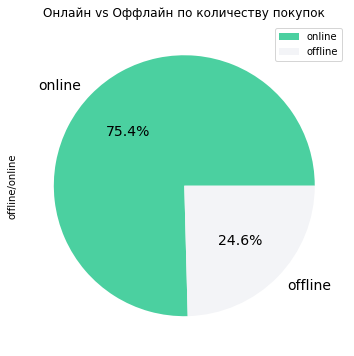

In [464]:
ax = pie_data.plot(kind='pie', figsize = (12,6), autopct='%1.1f%%',  legend = True, fontsize=14, colors =['#4bd0a0','#f3f4f7']
,                   title='Онлайн vs Оффлайн по количеству покупок')

In [ ]:
#Более 3/4 всех транзакций совершено онлайн

In [54]:
df_sum = df[['offline/online', 'Total_price']]

In [55]:
df_sum

,offline/online,Total_price
0,online,15.30
1,online,20.34
2,online,22.00
3,online,20.34
4,online,20.34
...,...,...
541904,online,10.20
541905,online,12.60
541906,online,16.60
541907,online,16.60


In [618]:
df['Total_price'].sum()

9747747.933999998

In [56]:
pie_data_sum = df_sum.groupby('offline/online').sum('Total_price').sort_values(by = 'Total_price', ascending = False).reset_index()

In [57]:
pie_data_sum

,offline/online,Total_price
0,online,8.300066e+06
1,offline,1.447682e+06


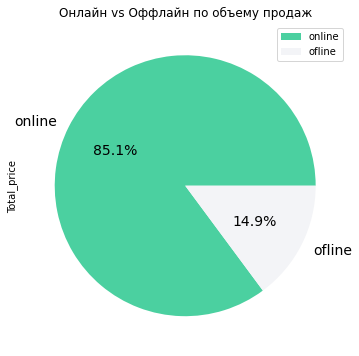

In [628]:
ax = pie_data_sum['Total_price'].plot(kind='pie', figsize = (12,6), autopct='%1.1f%%',  legend = True, fontsize=14, 
                                      colors =['#4bd0a0','#f3f4f7'],
                                      labels = ['online', 'ofline'],
                   title='Онлайн vs Оффлайн по объему продаж')

In [ ]:
#Более 85% объема продаж совершается онлайн

In [ ]:
#ДИНАМИКА ПРОДАЖ

In [ ]:
#Преобразую дату из строкового формата в datetime

In [59]:
df['InvoiceDate'] = df['InvoiceDate'].apply(lambda d: datetime.strptime(d, '%m/%d/%Y %H:%M'))

In [60]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_price,offline/online
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,online
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,online
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,online
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,online
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,online
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20,online
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,online
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,online
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,online


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 539394 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   InvoiceNo       539394 non-null  object        
 1   StockCode       539394 non-null  object        
 2   Description     539394 non-null  object        
 3   Quantity        539394 non-null  int64         
 4   InvoiceDate     539394 non-null  datetime64[ns]
 5   UnitPrice       539394 non-null  float64       
 6   CustomerID      539394 non-null  object        
 7   Country         539394 non-null  object        
 8   Total_price     539394 non-null  float64       
 9   offline/online  539394 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 45.3+ MB


In [62]:
df['Year'] = pd.DatetimeIndex(df['InvoiceDate']).year 

In [63]:
df['Month'] = pd.DatetimeIndex(df['InvoiceDate']).month

In [64]:
df['Day'] = pd.DatetimeIndex(df['InvoiceDate']).day

In [65]:
df.describe()

,Quantity,UnitPrice,Total_price,Year,Month,Day
count,539394.000000,539394.000000,539394.000000,539394.000000,539394.000000,539394.000000
mean,9.845871,4.632614,18.071665,2010.921749,7.555807,15.018801
std,215.412253,96.984656,379.690931,0.268566,3.508824,8.660640
min,-80995.000000,-11062.060000,-168469.600000,2010.000000,1.000000,1.000000
25%,1.000000,1.250000,3.750000,2011.000000,5.000000,7.000000
50%,3.000000,2.080000,9.840000,2011.000000,8.000000,15.000000
75%,10.000000,4.130000,17.400000,2011.000000,11.000000,22.000000
max,80995.000000,38970.000000,168469.600000,2011.000000,12.000000,31.000000


In [66]:
df['InvoiceDate'].min()

Timestamp('2010-12-01 08:26:00')

In [67]:
df['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

In [ ]:
#В датасете представлены данные с 1 декабря 2010 по 09 декабря 2011.

In [68]:
df_date = df.groupby(['Year', 'Month'])[['Quantity','Total_price']].sum().reset_index()

In [69]:
df_date

,Year,Month,Quantity,Total_price
0,2010,12,343197,748957.020
1,2011,1,307940,560000.260
2,2011,2,280684,498062.650
3,2011,3,372131,683267.080
4,2011,4,295170,493207.121
5,2011,5,389870,723333.510
6,2011,6,381851,691123.120
7,2011,7,395731,681300.111
8,2011,8,409426,682680.510
9,2011,9,563391,1019687.622


In [ ]:
#Общий объем выручки за весь период

In [70]:
df_date['Total_price'].sum()

9747747.933999911

In [71]:
df['Total_price'].sum()

9747747.933999998

<AxesSubplot:title={'center':'Динамика продаж с декабря 2010 по декабрь 2011'}, xlabel='Месяц', ylabel='Продажи, млн. £'>

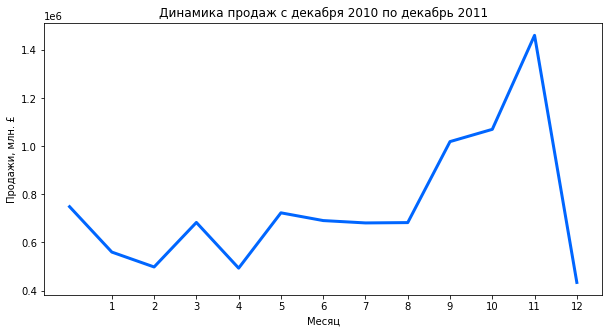

In [521]:
df_date['Total_price'].plot(title='Динамика продаж с декабря 2010 по декабрь 2011', 
                                        xlabel='Месяц', 
                                        ylabel='Продажи, млн. £', xticks=range(1, 13),
                                        figsize=(10, 5), linewidth=3,
                                        color ='#0066ff')

<AxesSubplot:title={'center':'Продажи с декабря 2010 по 2011 год'}, xlabel='Месяц', ylabel='Продажи, млн. £'>

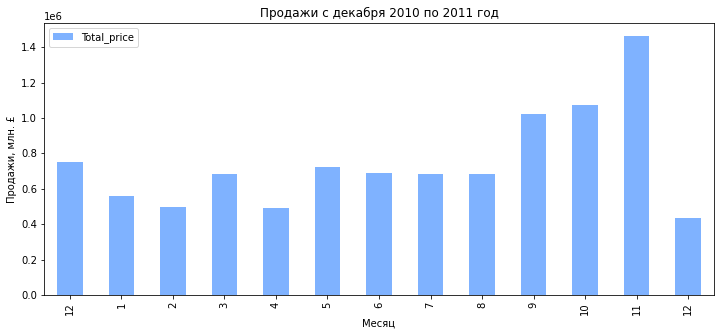

In [523]:
df_date.plot(kind='bar',
x='Month', 
        y='Total_price', 
                   color = '#0066ff',
                   alpha = 0.5,
                   title = 'Продажи с декабря 2010 по 2011 год',
              xlabel='Месяц', ylabel='Продажи, млн. £', figsize=(12, 5)
                   
        )

In [ ]:
#Спад продаж в декабре 2011 из-за того, что данные за этот месяц не полные, только по 09.12.2011.

In [ ]:
#Пик продаж пришелся на ноябрь 2011, построю столбчатую диаграмму продаж за этот месяц

In [144]:
df_11 = df[df['Month']==11]

In [145]:
df_11

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_price,offline/online,Year,Month,Day
431673,573744,21314,SMALL GLASS HEART TRINKET POT,8,2011-11-01 08:16:00,2.10,17733,United Kingdom,16.80,online,2011,11,1
431674,573744,21704,BAG 250g SWIRLY MARBLES,12,2011-11-01 08:16:00,0.85,17733,United Kingdom,10.20,online,2011,11,1
431675,573744,21791,VINTAGE HEADS AND TAILS CARD GAME,12,2011-11-01 08:16:00,1.25,17733,United Kingdom,15.00,online,2011,11,1
431676,573744,21892,TRADITIONAL WOODEN CATCH CUP GAME,12,2011-11-01 08:16:00,1.25,17733,United Kingdom,15.00,online,2011,11,1
431677,573744,21915,RED HARMONICA IN BOX,12,2011-11-01 08:16:00,1.25,17733,United Kingdom,15.00,online,2011,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
516379,C579886,22197,POPCORN HOLDER,-1,2011-11-30 17:39:00,0.85,15676,United Kingdom,-0.85,online,2011,11,30
516380,C579886,23146,TRIPLE HOOK ANTIQUE IVORY ROSE,-1,2011-11-30 17:39:00,3.29,15676,United Kingdom,-3.29,online,2011,11,30
516381,C579887,84946,ANTIQUE SILVER T-LIGHT GLASS,-1,2011-11-30 17:42:00,1.25,16717,United Kingdom,-1.25,online,2011,11,30
516382,C579887,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,-1,2011-11-30 17:42:00,7.95,16717,United Kingdom,-7.95,online,2011,11,30


In [146]:
df_date_11 = df_11.groupby(['Day'])[['Quantity','Total_price']].sum().reset_index()

In [147]:
df_date_11

,Day,Quantity,Total_price
0,1,16492,28741.55
1,2,28118,45239.06
2,3,34233,62816.55
3,4,34260,60081.76
4,6,23295,42912.40
5,7,30675,70001.08
6,8,26055,56647.66
7,9,36293,62599.43
8,10,38017,68956.24
9,11,28749,54835.51


<AxesSubplot:title={'center':'Продажи за ноябрь 2011 года'}, xlabel='День', ylabel='Продажи, £'>

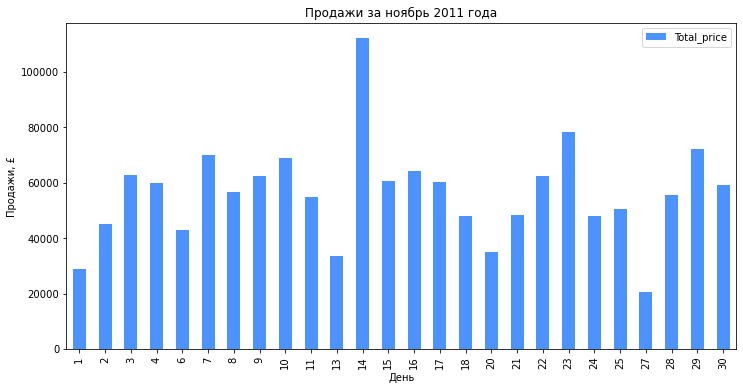

In [502]:
df_date_11.plot(kind='bar', x='Day', y='Total_price', 
                    xlabel='День', ylabel='Продажи, £',
                    title = 'Продажи за ноябрь 2011 года', figsize = (12,6), alpha = 0.7,
                    color = '#0066ff'
        )

In [79]:
df_date_11[df_date_11['Day']==14]

,Day,Quantity,Total_price
11,14,47160,112141.11


In [80]:
df_date_11['Total_price'].sum()

1461756.249999999

In [ ]:
#14 ноября 2011 продали на самую большую сумму (112141.11). Отсутствуют данные за 5,12 и 26 ноября 2011

In [166]:
df_04 = df[df['Month']==4]

In [167]:
df_date_04 = df_04.groupby(['Day'])[['Quantity','Total_price']].sum().reset_index()

In [192]:
df_date_04['Total_price'].sum()

493207.1210000017

<AxesSubplot:title={'center':'Продажи за апрель 2011 года'}, xlabel='День', ylabel='Продажи, £'>

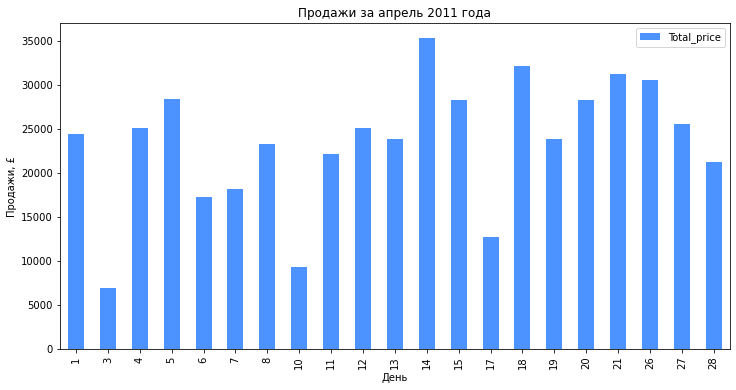

In [504]:
df_date_04.plot(kind='bar', x='Day', y='Total_price', 
                    xlabel='День', ylabel='Продажи, £',
                    alpha = 0.7,
                    title = 'Продажи за апрель 2011 года', figsize = (12,6),
                    color = '#0066ff'
                
        )

In [ ]:
 #Отсутствуют данные за 2,9,16,22,23,24,25,29 и 30 апреля 2011. Низкие показатели объема продаж за апрель 2011
#обусловлены отсутствием данных о продажах за 9 дней этого месяца. И в ноябре и в апреле прослеживается тенденция 
#спада продаж по воскресеньям.

In [ ]:
#выведу данные о количестве дней каждого месяца, за которые есть данные в датасете

In [220]:
df_days = df.groupby(['Year','Month','Day']).sum().reset_index()

In [221]:
df_t = df_days.groupby(['Year','Month'])['Day'].count().reset_index()

In [222]:
df_t

,Year,Month,Day
0,2010,12,20
1,2011,1,24
2,2011,2,24
3,2011,3,27
4,2011,4,21
5,2011,5,25
6,2011,6,26
7,2011,7,26
8,2011,8,26
9,2011,9,26


In [223]:
df_t['day_of_month']=pd.Series([31,31,28,31,30,31,30,31,31,30,31,30,31])

In [224]:
df_t

,Year,Month,Day,day_of_month
0,2010,12,20,31
1,2011,1,24,31
2,2011,2,24,28
3,2011,3,27,31
4,2011,4,21,30
5,2011,5,25,31
6,2011,6,26,30
7,2011,7,26,31
8,2011,8,26,31
9,2011,9,26,30


In [225]:
df_t['no_day']=df_t['day_of_month']-df_t['Day']

In [ ]:
#В датасете в каждом месяце отсутствуют данные за несколько дней от 4 до 11 дней (декабрь 2010). 
#За декабрь 2011 предоставлены данные за 8 дней.
#Необходимо выяснить причину отсутствия данных.

In [226]:
df_t[['Year', 'Month', 'no_day']]

,Year,Month,no_day
0,2010,12,11
1,2011,1,7
2,2011,2,4
3,2011,3,4
4,2011,4,9
5,2011,5,6
6,2011,6,4
7,2011,7,5
8,2011,8,5
9,2011,9,4


In [ ]:
#Посмотрю продажи по странам

In [638]:
df_date_country = df.groupby(['Country'])[['Quantity','Total_price']].sum().sort_values('Quantity', ascending = False).reset_index()

In [639]:
df_date_country

,Country,Quantity,Total_price
0,United Kingdom,4399359,8.187806e+06
1,Netherlands,199552,2.846615e+05
2,EIRE,142363,2.632768e+05
3,Germany,117446,2.216982e+05
4,France,110479,1.974039e+05
5,Australia,83345,1.370773e+05
6,Sweden,35637,3.659591e+04
7,Switzerland,30324,5.638535e+04
8,Spain,26813,5.477458e+04
9,Japan,25218,3.534062e+04


In [ ]:
#Выведу TOP-5 стран с самым большим количеством проданных товаров

In [83]:
dft5 = df_date_country.head(5).reset_index()

In [84]:
dft5

,index,Country,Quantity,Total_price
0,0,United Kingdom,4399359,8.187806e+06
1,1,Netherlands,199552,2.846615e+05
2,2,EIRE,142363,2.632768e+05
3,3,Germany,117446,2.216982e+05
4,4,France,110479,1.974039e+05


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'United Kingdom'),
  Text(1, 0, 'Netherlands'),
  Text(2, 0, 'EIRE'),
  Text(3, 0, 'Germany'),
  Text(4, 0, 'France')])

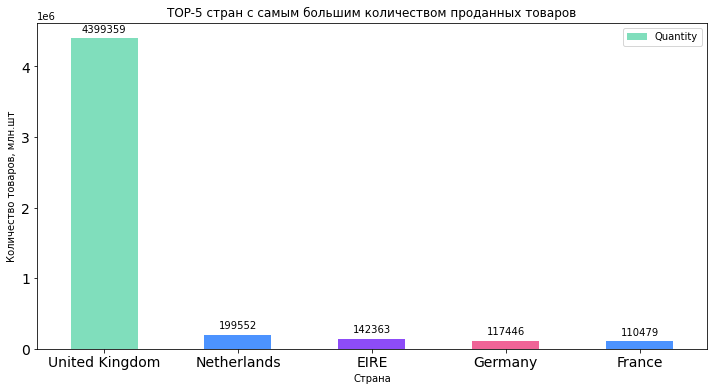

In [515]:
colors = ['#4bd0a0', '#0066ff', '#5d00f5', '#eb236b', '#0066ff']
ax = dft5.plot(kind='bar', x='Country', y='Quantity', 
                    xlabel='Страна', ylabel='Количество товаров, млн.шт',
                    title = 'TOP-5 стран с самым большим количеством проданных товаров', figsize = (12,6), fontsize=14, alpha = 0.7,
               color = colors)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')
plt.xticks(rotation=0)

In [ ]:
#Выведу 5 стран с наименьшим количеством проданных товаров

In [86]:
df_date_country.tail(5)

,Country,Quantity,Total_price
33,Lebanon,386,1693.88
34,Brazil,356,1143.60
35,RSA,351,1002.31
36,Bahrain,260,548.40
37,Saudi Arabia,75,131.17


In [ ]:
#отсортирую данные по объему общей выручки

In [87]:
df_date_top5_sum = df_date_country.sort_values('Total_price', ascending = False).reset_index()

In [88]:
df_date_top5_sum

,index,Country,Quantity,Total_price
0,0,United Kingdom,4399359,8.187806e+06
1,1,Netherlands,199552,2.846615e+05
2,2,EIRE,142363,2.632768e+05
3,3,Germany,117446,2.216982e+05
4,4,France,110479,1.974039e+05
5,5,Australia,83345,1.370773e+05
6,7,Switzerland,30324,5.638535e+04
7,8,Spain,26813,5.477458e+04
8,10,Belgium,23152,4.091096e+04
9,6,Sweden,35637,3.659591e+04


In [ ]:
#Посчитаю процент продаж в Великобритании от общего объема

In [643]:
df_date_top5_sum[df_date_top5_sum['Country']=='United Kingdom']['Total_price']/df['Total_price'].sum()*100

0    83.996903
Name: Total_price, dtype: float64

In [89]:
dfts5 = df_date_top5_sum.head(5).reset_index()

In [90]:
dfts5

,level_0,index,Country,Quantity,Total_price
0,0,0,United Kingdom,4399359,8.187806e+06
1,1,1,Netherlands,199552,2.846615e+05
2,2,2,EIRE,142363,2.632768e+05
3,3,3,Germany,117446,2.216982e+05
4,4,4,France,110479,1.974039e+05


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'United Kingdom'),
  Text(1, 0, 'Netherlands'),
  Text(2, 0, 'EIRE'),
  Text(3, 0, 'Germany'),
  Text(4, 0, 'France')])

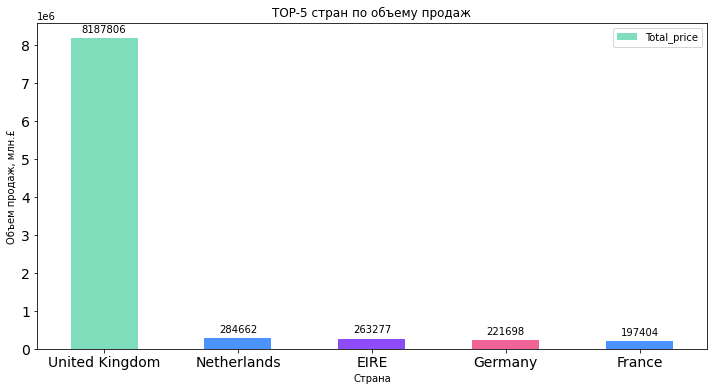

In [514]:
colors = ['#4bd0a0', '#0066ff', '#5d00f5', '#eb236b', '#0066ff']
ax = dfts5.plot(kind='bar', x='Country', y='Total_price', 
                    xlabel='Страна', ylabel='Объем продаж, млн.£',
                    linewidth=2,
                    title = 'TOP-5 стран по объему продаж', figsize = (12,6), fontsize=14, alpha = 0.7,
     color = colors   )
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')
plt.xticks(rotation=0)

In [ ]:
#TOP-5 стран по объему продаж выглядит также как и по количеству проданных товаров. Это United Kingdom(основная доля продаж),
#Netherlands, EIRE, Germany и France.

In [ ]:
#Выведу 5 стран с наименьшим объемом продаж

In [92]:
df_date_top5_sum.tail(5)

,index,Country,Quantity,Total_price
33,34,Brazil,356,1143.60
34,35,RSA,351,1002.31
35,31,Czech Republic,592,707.72
36,36,Bahrain,260,548.40
37,37,Saudi Arabia,75,131.17


In [ ]:
#посчитаю средний чек

In [ ]:
#уберу из датафрейма возвраты и служебные операции

In [102]:
df_chek = df[~(df.InvoiceNo.str.contains(r'\D'))&(~df.Description.isin(service_operations))]

In [103]:
df_chek

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_price,offline/online,Year,Month,Day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,online,2010,12,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,online,2010,12,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,online,2010,12,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,online,2010,12,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,online,2010,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20,online,2011,12,9
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,online,2011,12,9
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,online,2011,12,9
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,online,2011,12,9


In [ ]:
#посчитаю сумму каждого чека

In [104]:
dfck = df_chek.groupby('InvoiceNo').sum('Total_price').reset_index()

In [105]:
dfck_time = df_chek.groupby(['Year','Month','InvoiceNo']).sum('Total_price').reset_index()

In [106]:
dfck_time

,Year,Month,InvoiceNo,Quantity,UnitPrice,Total_price,Day
0,2010,12,536365,40,27.37,139.12,7
1,2010,12,536366,12,3.70,22.20,2
2,2010,12,536367,83,58.24,278.73,12
3,2010,12,536368,15,19.10,70.05,4
4,2010,12,536369,3,5.95,17.85,1
...,...,...,...,...,...,...,...
19768,2011,12,581583,76,3.30,124.60,18
19769,2011,12,581584,120,2.57,140.64,18
19770,2011,12,581585,278,37.78,329.05,189
19771,2011,12,581586,66,20.23,339.20,36


In [107]:
dfck_time['Total_price'].mean()

519.502294694788

In [108]:
dfck_time.describe()

,Year,Month,Quantity,UnitPrice,Total_price,Day
count,19773.000000,19773.000000,19773.000000,19773.000000,19773.000000,19773.000000
mean,2010.921610,7.381682,282.058160,87.190300,519.502295,400.893795
std,0.268791,3.451453,959.094724,195.746649,1764.245732,845.837830
min,2010.000000,1.000000,1.000000,0.040000,0.380000,1.000000
25%,2011.000000,5.000000,71.000000,17.360000,152.400000,60.000000
50%,2011.000000,8.000000,153.000000,43.450000,302.590000,180.000000
75%,2011.000000,11.000000,298.000000,86.940000,483.650000,437.000000
max,2011.000000,12.000000,80995.000000,5012.310000,168469.600000,34503.000000


In [109]:
dfck_time_group = dfck_time.groupby(['Year','Month']).mean('Total_price').reset_index()

In [110]:
dfck_time_group = dfck_time_group[['Year','Month','Total_price']]

In [111]:
dfck_time_group.columns = ['Year','Month','Average_check']

In [112]:
dfck_time_group['Year/Month']=dfck_time_group['Month'].astype(str)+'/'+dfck_time_group['Year'].astype(str)

In [113]:
dfck_time_group

,Year,Month,Average_check,Year/Month
0,2010,12,501.940877,12/2010
1,2011,1,621.639602,1/2011
2,2011,2,465.647640,2/2011
3,2011,3,480.045792,3/2011
4,2011,4,418.064608,4/2011
5,2011,5,444.409916,5/2011
6,2011,6,484.509430,6/2011
7,2011,7,474.791833,7/2011
8,2011,8,541.900792,8/2011
9,2011,9,566.831882,9/2011


In [ ]:
#В декабре 2011 получилось самое большое значение среднего чека, но нужно учитывать тот факт, что данные неполные, 
#только по 09.12.21.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, '12/2010'),
  Text(1, 0, '1/2011'),
  Text(2, 0, '2/2011'),
  Text(3, 0, '3/2011'),
  Text(4, 0, '4/2011'),
  Text(5, 0, '5/2011'),
  Text(6, 0, '6/2011'),
  Text(7, 0, '7/2011'),
  Text(8, 0, '8/2011'),
  Text(9, 0, '9/2011'),
  Text(10, 0, '10/2011'),
  Text(11, 0, '11/2011'),
  Text(12, 0, '12/2011')])

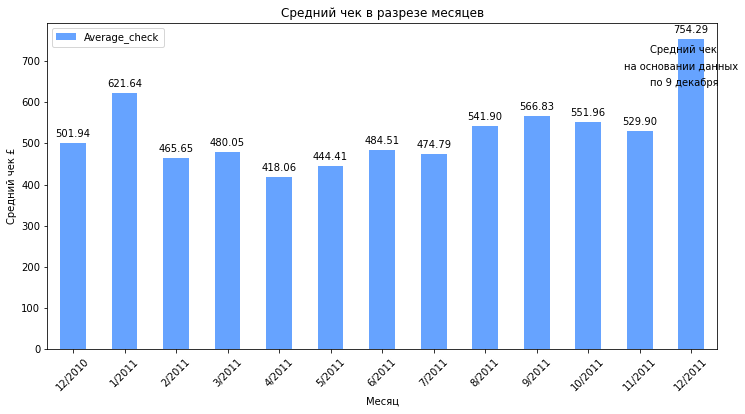

In [513]:
ax = dfck_time_group.plot(kind='bar',
x='Year/Month',
        y='Average_check', 
                   alpha = 0.6,
                   title = 'Средний чек в разрезе месяцев',
              xlabel='Месяц', ylabel='Средний чек £', figsize=(12, 6),
                    color = '#0066ff'
                   
        )
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')
ax.text(11.2, 720, 'Средний чек ')  
ax.text(10.7, 680, 'на основании данных')  
ax.text(11.2, 640, 'по 9 декабря ') 
plt.xticks(rotation=45)

In [ ]:
#Всего чеков - 19773 , средний чек составил 519,50£. Это среднее значение по оптовым и розничным покупателям без учета возвратов и 
#служебных операций. Предлагаю завести в базе поле с указанием оптовый и розничный покупатель, тогда удобно будет смотреть
#средние показатели по каждой группе покупателей.
#В декабре 2011 средний чек рассчитан на основании данных до 9 декабря.

In [ ]:
#посчитаю средний чек по странам

In [127]:
dfck_c = df_chek.groupby(['Country', 'InvoiceNo']).sum('Total_price').reset_index()

In [128]:
dfck_c

,Country,InvoiceNo,Quantity,UnitPrice,Total_price,Year,Month,Day
0,Australia,536389,107,73.90,358.25,28140,168,14
1,Australia,537676,214,21.81,258.90,16080,96,64
2,Australia,539419,146,35.10,415.70,20100,120,170
3,Australia,540267,4662,86.08,7011.38,92506,46,276
4,Australia,540280,140,2.10,143.00,4022,2,12
...,...,...,...,...,...,...,...,...
19768,Unspecified,563947,126,16.67,252.90,14077,56,154
19769,Unspecified,564051,59,129.84,278.13,32176,128,352
19770,Unspecified,565303,258,108.43,286.85,132726,594,132
19771,Unspecified,576646,188,44.45,333.20,38209,209,304


In [129]:
dfck_cc = dfck_c.groupby('Country').mean('Total_price').sort_values('Total_price', ascending = False).reset_index()[['Country', 'Total_price']]

In [130]:
dfck_cc

,Country,Total_price
0,Netherlands,3052.573548
1,Australia,2467.344821
2,Singapore,2280.097500
3,Japan,1969.282632
4,Lebanon,1693.880000
5,Hong Kong,1421.855714
6,Brazil,1143.600000
7,Sweden,1083.509706
8,Switzerland,1061.758000
9,Israel,1016.907500


In [131]:
#посчитаю количество чеков по странам

In [132]:
d_country_quantity = dfck_c.groupby(['Country']).count().reset_index()[['Country','Quantity']]

In [133]:
d_country_quantity

,Country,Quantity
0,Australia,56
1,Austria,17
2,Bahrain,3
3,Belgium,98
4,Brazil,1
5,Canada,5
6,Channel Islands,25
7,Cyprus,14
8,Czech Republic,2
9,Denmark,18


In [ ]:
#объединяю датафрейм со средними чеками по странам с датафреймом с количеством чеков по странам

In [134]:
df_unit = dfck_cc.merge(d_country_quantity, on = 'Country', how='outer')

In [135]:
df_unit

,Country,Total_price,Quantity
0,Netherlands,3052.573548,93
1,Australia,2467.344821,56
2,Singapore,2280.097500,4
3,Japan,1969.282632,19
4,Lebanon,1693.880000,1
5,Hong Kong,1421.855714,7
6,Brazil,1143.600000,1
7,Sweden,1083.509706,34
8,Switzerland,1061.758000,50
9,Israel,1016.907500,8


In [136]:
df_unit = df_unit.rename(columns={'Total_price': 'Average check', 'Quantity': 'Number_of_checks'})

In [137]:
df_unit

,Country,Average check,Number_of_checks
0,Netherlands,3052.573548,93
1,Australia,2467.344821,56
2,Singapore,2280.097500,4
3,Japan,1969.282632,19
4,Lebanon,1693.880000,1
5,Hong Kong,1421.855714,7
6,Brazil,1143.600000,1
7,Sweden,1083.509706,34
8,Switzerland,1061.758000,50
9,Israel,1016.907500,8


In [ ]:
#Хотя Великобритания лидирует по объему продаж, она находится на 25 месте по размеру среднего чека. 
#Следует обратить внимание на страны с высоким средним чеком и увеличивать количество продаж в них.

In [ ]:
#выведу количество зарегистрированных пользователей всего и TOP-5 стран с наибольшим количеством пользователей

In [614]:
df_cust_country = df[df['CustomerID']!='00000'].groupby([ 'Country', 'CustomerID']).count().reset_index().sort_values('Quantity', ascending = False)

In [615]:
df_cust_country

,Country,CustomerID,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Total_price,offline/online,Year,Month,Day
4046,United Kingdom,17841,7983,7983,7983,7983,7983,7983,7983,7983,7983,7983,7983
81,EIRE,14911,5901,5901,5901,5901,5901,5901,5901,5901,5901,5901,5901
1334,United Kingdom,14096,5128,5128,5128,5128,5128,5128,5128,5128,5128,5128,5128
428,United Kingdom,12748,4641,4641,4641,4641,4641,4641,4641,4641,4641,4641,4641
1701,United Kingdom,14606,2782,2782,2782,2782,2782,2782,2782,2782,2782,2782,2782
...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,Spain,12503,1,1,1,1,1,1,1,1,1,1,1
2351,United Kingdom,15510,1,1,1,1,1,1,1,1,1,1,1
3137,United Kingdom,16579,1,1,1,1,1,1,1,1,1,1,1
3444,United Kingdom,16990,1,1,1,1,1,1,1,1,1,1,1


In [616]:
df_cust_country.groupby([ 'Country']).count().sort_values('Quantity', ascending = False).head(5)

,CustomerID,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Total_price,offline/online,Year,Month,Day
Country,,,,,,,,,,,,
United Kingdom,3949,3949,3949,3949,3949,3949,3949,3949,3949,3949,3949,3949
Germany,95,95,95,95,95,95,95,95,95,95,95,95
France,87,87,87,87,87,87,87,87,87,87,87,87
Spain,31,31,31,31,31,31,31,31,31,31,31,31
Belgium,25,25,25,25,25,25,25,25,25,25,25,25


In [ ]:
#TOP-5 самых активных зарегистрированных пользователей

In [230]:
df[df['CustomerID']!='00000'].groupby(['CustomerID', 'Country']).count().sort_values('Quantity', ascending = False).reset_index()[['CustomerID', 'Country','Quantity']].head(5)

,CustomerID,Country,Quantity
0,17841,United Kingdom,7983
1,14911,EIRE,5901
2,14096,United Kingdom,5128
3,12748,United Kingdom,4641
4,14606,United Kingdom,2782


In [ ]:
#TOP-5 покупателей, принесших самый большой доход

In [231]:
df[df['CustomerID']!='00000'].groupby(['CustomerID', 'Country']).sum().sort_values('Total_price', ascending = False).reset_index()[['CustomerID', 'Country','Total_price']].head(5)

,CustomerID,Country,Total_price
0,14646,Netherlands,279489.02
1,18102,United Kingdom,256438.49
2,17450,United Kingdom,187482.17
3,14911,EIRE,132572.62
4,12415,Australia,123725.45


In [ ]:
#Помня, что CustomerID = '00000' это бывшие NaN (оффлайн и служебные операции), не беру их в расчет. Пользователь,
#купивший всех больше товаров из зарегистрированных - 17841 из Великобритании,
#пользователь, принесший самый большой доход - 14646 из Нидерландов.

In [ ]:
#Выведу самые популярные товары

In [233]:
df.groupby('Description').sum().sort_values('Quantity', ascending = False).reset_index()[['Description', 'Quantity', 'Total_price']].head(5)

,Description,Quantity,Total_price
0,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53847,13587.93
1,JUMBO BAG RED RETROSPOT,47359,92356.03
2,ASSORTED COLOUR BIRD ORNAMENT,36381,58959.73
3,POPCORN HOLDER,36334,33969.46
4,PACK OF 72 RETROSPOT CAKE CASES,36039,21059.72


In [ ]:
#Выведу самые популярные товары по странам 

In [234]:
df_popular_products_by_country = df.groupby([ 'Country', 'Description']).sum()[['Quantity', 'Total_price']].sort_values(['Country','Quantity'],
                                                    ascending = [True , False]).reset_index()

In [235]:
df_popular_products_by_country

,Country,Description,Quantity,Total_price
0,Australia,MINI PAINT SET VINTAGE,2916,1607.40
1,Australia,RABBIT NIGHT LIGHT,1884,3375.84
2,Australia,RED HARMONICA IN BOX,1704,1810.80
3,Australia,RED TOADSTOOL LED NIGHT LIGHT,1344,1987.20
4,Australia,DOLLY GIRL LUNCH BOX,1024,1689.60
...,...,...,...,...
19987,Unspecified,VINTAGE BEAD PINK EVENING BAG,1,1.25
19988,Unspecified,VINTAGE LEAF MAGNETIC NOTEPAD,1,1.45
19989,Unspecified,VINTAGE PAISLEY STATIONERY SET,1,1.25
19990,Unspecified,WASH BAG VINTAGE ROSE PAISLEY,1,2.55


In [ ]:
#выведу TOP-5 популярных товаров по Великобритании, Нидерландам, Ирландии, Германии и Франции

In [236]:
df_popular_products_by_country[df_popular_products_by_country['Country']=='United Kingdom'].head(5)

,Country,Description,Quantity,Total_price
15627,United Kingdom,WORLD WAR 2 GLIDERS ASSTD DESIGNS,48326,12055.96
15628,United Kingdom,JUMBO BAG RED RETROSPOT,43163,84516.44
15629,United Kingdom,POPCORN HOLDER,34365,32425.81
15630,United Kingdom,ASSORTED COLOUR BIRD ORNAMENT,33679,54662.15
15631,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,33189,93953.07


In [237]:
df_popular_products_by_country[df_popular_products_by_country['Country']=='Netherlands'].head(5)

,Country,Description,Quantity,Total_price
10478,Netherlands,RABBIT NIGHT LIGHT,4801,9568.48
10479,Netherlands,SPACEBOY LUNCH BOX,4528,7485.60
10480,Netherlands,DOLLY GIRL LUNCH BOX,4132,6828.60
10481,Netherlands,PACK OF 72 RETROSPOT CAKE CASES,4128,1740.00
10482,Netherlands,ROUND SNACK BOXES SET OF4 WOODLAND,3132,7991.40


In [238]:
df_popular_products_by_country[df_popular_products_by_country['Country']=='EIRE'].head(5)

,Country,Description,Quantity,Total_price
3107,EIRE,PACK OF 72 RETROSPOT CAKE CASES,1728,872.40
3108,EIRE,60 TEATIME FAIRY CAKE CASES,1536,720.00
3109,EIRE,VINTAGE SNAP CARDS,1492,1137.16
3110,EIRE,ASSORTED INCENSE PACK,1440,230.40
3111,EIRE,PACK OF 60 PINK PAISLEY CAKE CASES,1296,603.60


In [526]:
df_popular_products_by_country[(df_popular_products_by_country['Country']=='Germany')&(df_popular_products_by_country['Description']!='POSTAGE')].head(5)

,Country,Description,Quantity,Total_price
7214,Germany,ROUND SNACK BOXES SET OF4 WOODLAND,1218,3554.70
7215,Germany,ASSORTED COLOURS SILK FAN,1164,853.32
7217,Germany,WOODLAND CHARLOTTE BAG,1019,853.15
7218,Germany,PACK OF 72 RETROSPOT CAKE CASES,1002,551.10
7219,Germany,PACK OF 6 BIRDY GIFT TAGS,936,1033.20


In [240]:
df_popular_products_by_country[df_popular_products_by_country['Country']=='France'].head(5)

,Country,Description,Quantity,Total_price
5649,France,RABBIT NIGHT LIGHT,4023,7275.12
5650,France,MINI PAINT SET VINTAGE,2196,1427.40
5651,France,RED TOADSTOOL LED NIGHT LIGHT,1314,2168.10
5652,France,SET/6 RED SPOTTY PAPER CUPS,1272,826.80
5653,France,ASSORTED COLOUR BIRD ORNAMENT,1204,1842.76


In [ ]:
#Выведу самые крупные покупки (самые большие суммы чеков)

In [528]:
df.groupby(['InvoiceNo', 'CustomerID', 'Country']).sum().sort_values('Total_price', ascending = False).reset_index().head(10)

,InvoiceNo,CustomerID,Country,Quantity,UnitPrice,Total_price,Year,Month,Day
0,581483,16446,United Kingdom,80995,2.08,168469.60,2011,12,9
1,541431,12346,United Kingdom,74215,1.04,77183.60,2011,1,18
2,574941,00000,United Kingdom,14149,498.89,52940.94,203111,1111,707
3,576365,00000,United Kingdom,13956,469.51,50653.91,199089,1089,1386
4,556444,15098,United Kingdom,60,649.50,38970.00,2011,6,10
5,567423,17450,United Kingdom,12572,36.77,31698.16,24132,108,240
6,556917,12415,Australia,15049,283.57,22775.93,277518,828,2070
7,572209,18102,United Kingdom,1920,86.50,22206.00,14077,70,147
8,567381,17450,United Kingdom,6760,42.60,22104.80,24132,108,240
9,563614,12415,Australia,12196,218.72,21880.44,195067,776,1746


In [242]:
df.groupby(['InvoiceNo', 'CustomerID', 'Country']).sum().sort_values('Total_price', ascending = False).tail(10)

,,,Quantity,UnitPrice,Total_price,Year,Month,Day
InvoiceNo,CustomerID,Country,,,,,,
C537644,00000,United Kingdom,-1,13474.79,-13474.79,2010,12,7
C537630,00000,United Kingdom,-1,13541.33,-13541.33,2010,12,7
C537651,00000,United Kingdom,-1,13541.33,-13541.33,2010,12,7
C540118,00000,United Kingdom,-1,16453.71,-16453.71,2011,1,5
C540117,00000,United Kingdom,-1,16888.02,-16888.02,2011,1,5
C580605,00000,United Kingdom,-1,17836.46,-17836.46,2011,12,5
C550456,15749,United Kingdom,-9014,15.80,-22998.40,10055,20,90
C556445,15098,United Kingdom,-1,38970.00,-38970.00,2011,6,10
C541433,12346,United Kingdom,-74215,1.04,-77183.60,2011,1,18


In [243]:
df[df['InvoiceNo']== '581483']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_price,offline/online,Year,Month,Day
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446,United Kingdom,168469.6,online,2011,12,9


In [244]:
df[df['CustomerID'] == '16446']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_price,offline/online,Year,Month,Day
194354,553573,22980,PANTRY SCRUBBING BRUSH,1,2011-05-18 09:52:00,1.65,16446,United Kingdom,1.65,online,2011,5,18
194355,553573,22982,PANTRY PASTRY BRUSH,1,2011-05-18 09:52:00,1.25,16446,United Kingdom,1.25,online,2011,5,18
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446,United Kingdom,168469.60,online,2011,12,9
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446,United Kingdom,-168469.60,online,2011,12,9


In [245]:
df.groupby(['InvoiceNo', 'CustomerID', 'Country']).sum().sort_values('Total_price', ascending = False).head(10)

,,,Quantity,UnitPrice,Total_price,Year,Month,Day
InvoiceNo,CustomerID,Country,,,,,,
581483,16446,United Kingdom,80995,2.08,168469.60,2011,12,9
541431,12346,United Kingdom,74215,1.04,77183.60,2011,1,18
574941,00000,United Kingdom,14149,498.89,52940.94,203111,1111,707
576365,00000,United Kingdom,13956,469.51,50653.91,199089,1089,1386
556444,15098,United Kingdom,60,649.50,38970.00,2011,6,10
567423,17450,United Kingdom,12572,36.77,31698.16,24132,108,240
556917,12415,Australia,15049,283.57,22775.93,277518,828,2070
572209,18102,United Kingdom,1920,86.50,22206.00,14077,70,147
567381,17450,United Kingdom,6760,42.60,22104.80,24132,108,240


In [246]:
df[df['InvoiceNo']=='574941']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_price,offline/online,Year,Month,Day
446951,574941,23582,VINTAGE DOILY JUMBO BAG RED,147,2011-11-07 17:42:00,4.95,00000,United Kingdom,727.65,offline,2011,11,7
446952,574941,23581,JUMBO BAG PAISLEY PARK,314,2011-11-07 17:42:00,4.95,00000,United Kingdom,1554.30,offline,2011,11,7
446953,574941,23570,TRADITIONAL PICK UP STICKS GAME,384,2011-11-07 17:42:00,2.95,00000,United Kingdom,1132.80,offline,2011,11,7
446954,574941,23571,TRADITIONAL NAUGHTS & CROSSES,370,2011-11-07 17:42:00,3.95,00000,United Kingdom,1461.50,offline,2011,11,7
446955,574941,23551,PACK OF 12 PAISLEY PARK TISSUES,64,2011-11-07 17:42:00,1.00,00000,United Kingdom,64.00,offline,2011,11,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
447047,574941,20971,PINK BLUE FELT CRAFT TRINKET BOX,242,2011-11-07 17:42:00,2.95,00000,United Kingdom,713.90,offline,2011,11,7
447048,574941,84978,HANGING HEART JAR T-LIGHT HOLDER,140,2011-11-07 17:42:00,2.95,00000,United Kingdom,413.00,offline,2011,11,7
447049,574941,84946,ANTIQUE SILVER T-LIGHT GLASS,168,2011-11-07 17:42:00,2.95,00000,United Kingdom,495.60,offline,2011,11,7
447050,574941,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,236,2011-11-07 17:42:00,5.95,00000,United Kingdom,1404.20,offline,2011,11,7


In [247]:
df[df['InvoiceNo']=='576365']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_price,offline/online,Year,Month,Day
467719,576365,22745,POPPY'S PLAYHOUSE BEDROOM,41,2011-11-14 17:55:00,4.95,00000,United Kingdom,202.95,offline,2011,11,14
467720,576365,22748,POPPY'S PLAYHOUSE KITCHEN,55,2011-11-14 17:55:00,4.95,00000,United Kingdom,272.25,offline,2011,11,14
467721,576365,23582,VINTAGE DOILY JUMBO BAG RED,153,2011-11-14 17:55:00,4.95,00000,United Kingdom,757.35,offline,2011,11,14
467722,576365,23581,JUMBO BAG PAISLEY PARK,225,2011-11-14 17:55:00,4.95,00000,United Kingdom,1113.75,offline,2011,11,14
467723,576365,23570,TRADITIONAL PICK UP STICKS GAME,360,2011-11-14 17:55:00,2.95,00000,United Kingdom,1062.00,offline,2011,11,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
467813,576365,20971,PINK BLUE FELT CRAFT TRINKET BOX,246,2011-11-14 17:55:00,2.95,00000,United Kingdom,725.70,offline,2011,11,14
467814,576365,84978,HANGING HEART JAR T-LIGHT HOLDER,246,2011-11-14 17:55:00,2.95,00000,United Kingdom,725.70,offline,2011,11,14
467815,576365,84946,ANTIQUE SILVER T-LIGHT GLASS,130,2011-11-14 17:55:00,2.95,00000,United Kingdom,383.50,offline,2011,11,14
467816,576365,84832,ZINC WILLIE WINKIE CANDLE STICK,94,2011-11-14 17:55:00,1.95,00000,United Kingdom,183.30,offline,2011,11,14


In [248]:
df[df['CustomerID']=='15098']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_price,offline/online,Year,Month,Day
222670,556442,22502,PICNIC BASKET WICKER SMALL,60,2011-06-10 15:22:00,4.95,15098,United Kingdom,297.0,online,2011,6,10
222680,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,2011-06-10 15:28:00,649.50,15098,United Kingdom,38970.0,online,2011,6,10
222681,C556445,M,Manual,-1,2011-06-10 15:31:00,38970.00,15098,United Kingdom,-38970.0,online,2011,6,10
222682,556446,22502,PICNIC BASKET WICKER 60 PIECES,1,2011-06-10 15:33:00,649.50,15098,United Kingdom,649.5,online,2011,6,10
222692,C556448,22502,PICNIC BASKET WICKER SMALL,-60,2011-06-10 15:39:00,4.95,15098,United Kingdom,-297.0,online,2011,6,10


In [529]:
df[df['CustomerID']=='12415']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_price,offline/online,Year,Month,Day
45511,540267,22078,RIBBON REEL LACE DESIGN,120,2011-01-06 11:12:00,1.85,12415,Australia,222.0,online,2011,1,6
45512,540267,22079,RIBBON REEL HEARTS DESIGN,120,2011-01-06 11:12:00,1.45,12415,Australia,174.0,online,2011,1,6
45513,540267,22080,RIBBON REEL POLKADOTS,120,2011-01-06 11:12:00,1.45,12415,Australia,174.0,online,2011,1,6
45514,540267,22077,6 RIBBONS RUSTIC CHARM,144,2011-01-06 11:12:00,1.45,12415,Australia,208.8,online,2011,1,6
45515,540267,22505,MEMO BOARD COTTAGE DESIGN,24,2011-01-06 11:12:00,4.25,12415,Australia,102.0,online,2011,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
468150,576394,22196,SMALL HEART MEASURING SPOONS,160,2011-11-15 10:32:00,0.72,12415,Australia,115.2,online,2011,11,15
468151,576394,22195,LARGE HEART MEASURING SPOONS,80,2011-11-15 10:32:00,1.45,12415,Australia,116.0,online,2011,11,15
468152,576394,48194,DOORMAT HEARTS,10,2011-11-15 10:32:00,7.08,12415,Australia,70.8,online,2011,11,15
468153,576394,84992,72 SWEETHEART FAIRY CAKE CASES,120,2011-11-15 10:32:00,0.42,12415,Australia,50.4,online,2011,11,15


In [ ]:
#Хотя самые крупные покупки среди зарегистрированных пользователей были сделаны покупателями 16446, 12346, 15098, 
#но по ним были оформлены возвраты.
#Также 2 крупные покупки совершены в оффлайн магазине пользователями из Великобритании. 
#Далее крупные покупки были совершены покупателями 17450, 18102, 17450 из Великобритании и 12415, 12415 из Австралии.

In [249]:
df[df['CustomerID']=='17450'].sort_values('Total_price', ascending = False)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_price,offline/online,Year,Month,Day
348325,567423,23243,SET OF TEA COFFEE SUGAR TINS PANTRY,1412,2011-09-20 11:05:00,5.06,17450,United Kingdom,7144.72,online,2011,9,20
52134,540689,22470,HEART OF WICKER LARGE,1284,2011-01-11 08:43:00,3.21,17450,United Kingdom,4121.64,online,2011,1,11
348319,567423,23113,PANTRY CHOPPING BOARD,756,2011-09-20 11:05:00,5.06,17450,United Kingdom,3825.36,online,2011,9,20
348323,567423,22722,SET OF 6 SPICE TINS PANTRY DESIGN,852,2011-09-20 11:05:00,4.25,17450,United Kingdom,3621.00,online,2011,9,20
52132,540689,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1010,2011-01-11 08:43:00,3.24,17450,United Kingdom,3272.40,online,2011,1,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
322132,C565229,POST,POSTAGE,-1,2011-09-02 09:12:00,200.00,17450,United Kingdom,-200.00,online,2011,9,2
235379,C557638,POST,POSTAGE,-1,2011-06-21 16:01:00,545.58,17450,United Kingdom,-545.58,online,2011,6,21
88210,C543789,M,Manual,-1,2011-02-11 17:10:00,856.48,17450,United Kingdom,-856.48,online,2011,2,11
367063,C568832,23113,PANTRY CHOPPING BOARD,-186,2011-09-29 11:35:00,5.15,17450,United Kingdom,-957.90,online,2011,9,29


In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 539394 entries, 0 to 541908
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   InvoiceNo       539394 non-null  object        
 1   StockCode       539394 non-null  object        
 2   Description     539394 non-null  object        
 3   Quantity        539394 non-null  int64         
 4   InvoiceDate     539394 non-null  datetime64[ns]
 5   UnitPrice       539394 non-null  float64       
 6   CustomerID      539394 non-null  object        
 7   Country         539394 non-null  object        
 8   Total_price     539394 non-null  float64       
 9   offline/online  539394 non-null  object        
 10  Year            539394 non-null  int64         
 11  Month           539394 non-null  int64         
 12  Day             539394 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(6)
memory usage: 57.6+ MB


In [ ]:
# проанализирую возвраты

In [ ]:
#создам датафрем с возвратами, удалив служебные операции

In [251]:
df_return = df[df.InvoiceNo.str.contains(r'C\d{6}')&(~df.Description.isin(service_operations))]

In [252]:
df_return

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_price,offline/online,Year,Month,Day
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom,-4.65,online,2010,12,1
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom,-19.80,online,2010,12,1
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,-6.96,online,2010,12,1
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,-6.96,online,2010,12,1
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,-6.96,online,2010,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540448,C581490,22178,VICTORIAN GLASS HANGING T-LIGHT,-12,2011-12-09 09:57:00,1.95,14397,United Kingdom,-23.40,online,2011,12,9
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397,United Kingdom,-9.13,online,2011,12,9
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311,United Kingdom,-54.75,online,2011,12,9
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315,United Kingdom,-1.25,online,2011,12,9


In [253]:
df_return[df_return['Description']=='POSTAGE']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_price,offline/online,Year,Month,Day


In [254]:
df_return[df_return['StockCode']=='POST']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_price,offline/online,Year,Month,Day


In [ ]:
#df[df['CustomerID']=='15107']

In [255]:
df_return_by_countries = df_return.groupby('Country')[['Quantity','Total_price']].sum().sort_values('Quantity', ascending = True).reset_index()

In [256]:
df_return_by_countries

,Country,Quantity,Total_price
0,United Kingdom,-258099,-445843.38
1,EIRE,-4800,-11500.84
2,Germany,-1798,-4761.49
3,France,-1579,-2419.35
4,USA,-1424,-1849.47
5,Spain,-1124,-3959.91
6,Japan,-795,-1996.58
7,Australia,-555,-1181.31
8,Sweden,-443,-1662.42
9,Netherlands,-324,-409.80


In [ ]:
#Создам датафрейм только с покупками, чтобы вычислить процент возврата

In [257]:
df_plus = df[df['Quantity']>0]

In [258]:
df_plus

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_price,offline/online,Year,Month,Day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,online,2010,12,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,online,2010,12,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,online,2010,12,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,online,2010,12,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,online,2010,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20,online,2011,12,9
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,online,2011,12,9
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,online,2011,12,9
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,online,2011,12,9


In [259]:
df_country_plus = df_plus.groupby('Country')[['Quantity','Total_price']].sum().sort_values('Quantity', ascending = False).reset_index()

In [260]:
df_country_plus

,Country,Quantity,Total_price
0,United Kingdom,4662392,9.003098e+06
1,Netherlands,200361,2.854463e+05
2,EIRE,147173,2.834540e+05
3,Germany,119261,2.288671e+05
4,France,112103,2.097151e+05
5,Australia,83901,1.385213e+05
6,Sweden,36083,3.837833e+04
7,Switzerland,30629,5.708990e+04
8,Spain,27940,6.157711e+04
9,Japan,26016,3.741637e+04


In [ ]:
#объединю датафрейм с покупками и возвратами

In [261]:
df_joined = df_country_plus.merge(df_return_by_countries, on = 'Country', how='outer')

In [262]:
df_joined

,Country,Quantity_x,Total_price_x,Quantity_y,Total_price_y
0,United Kingdom,4662392,9.003098e+06,-258099.0,-445843.38
1,Netherlands,200361,2.854463e+05,-324.0,-409.80
2,EIRE,147173,2.834540e+05,-4800.0,-11500.84
3,Germany,119261,2.288671e+05,-1798.0,-4761.49
4,France,112103,2.097151e+05,-1579.0,-2419.35
5,Australia,83901,1.385213e+05,-555.0,-1181.31
6,Sweden,36083,3.837833e+04,-443.0,-1662.42
7,Switzerland,30629,5.708990e+04,-300.0,-582.55
8,Spain,27940,6.157711e+04,-1124.0,-3959.91
9,Japan,26016,3.741637e+04,-795.0,-1996.58


In [263]:
df_joined['Quantity_y'].sum()

-272030.0

In [264]:
df_return_by_countries['Quantity'].sum()

-272030

In [265]:
df_joined['percent_return_Quantity']= df_joined['Quantity_y']/df_joined['Quantity_x']*100*(-1)

In [266]:
df_joined['percent_return_Total_price']= df_joined['Total_price_y']/df_joined['Total_price_x']*100*(-1)

In [267]:
df_c_r = df_joined.sort_values('percent_return_Quantity', ascending =False).head(5)

In [268]:
df_c_r

,Country,Quantity_x,Total_price_x,Quantity_y,Total_price_y,percent_return_Quantity,percent_return_Total_price
25,USA,2458,3.580390e+03,-1424.0,-1849.47,57.933279,51.655546
36,Bahrain,314,7.541400e+02,-54.0,-205.74,17.197452,27.281407
30,Czech Republic,671,8.267400e+02,-78.0,-115.02,11.624441,13.912476
37,Saudi Arabia,80,1.459200e+02,-5.0,-14.75,6.250000,10.108279
0,United Kingdom,4662392,9.003098e+06,-258099.0,-445843.38,5.535764,4.952111


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'USA'),
  Text(1, 0, 'Bahrain'),
  Text(2, 0, 'Czech Republic'),
  Text(3, 0, 'Saudi Arabia'),
  Text(4, 0, 'United Kingdom')])

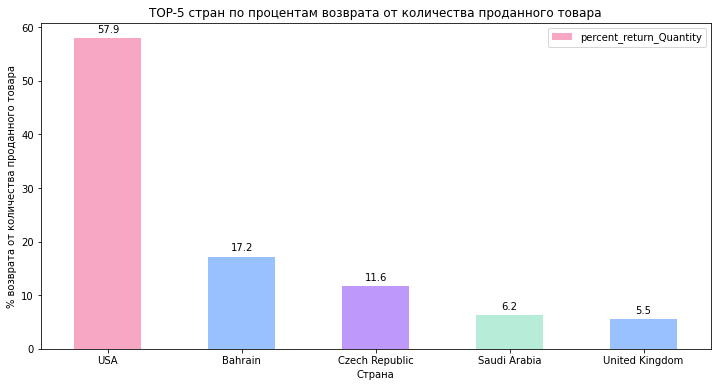

In [534]:
colors = ['#eb236b', '#0066ff', '#5d00f5', '#4bd0a0', '#0066ff']
ax = df_c_r.plot(kind='bar',
x='Country', 
        y='percent_return_Quantity', 
                    color = colors,
                   alpha = 0.4,
                   linewidth=2,
                   title = 'TOP-5 стран по процентам возврата от количества проданного товара',
              xlabel='Страна', ylabel='% возврата от количества проданного товара', figsize=(12, 6)         
        )
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')
plt.xticks(rotation=0)

In [271]:
df_c_r_sum = df_joined.sort_values('percent_return_Total_price', ascending =False).head(5)

In [272]:
df_c_r_sum

,Country,Quantity_x,Total_price_x,Quantity_y,Total_price_y,percent_return_Quantity,percent_return_Total_price
25,USA,2458,3580.39,-1424.0,-1849.47,57.933279,51.655546
36,Bahrain,314,754.14,-54.0,-205.74,17.197452,27.281407
30,Czech Republic,671,826.74,-78.0,-115.02,11.624441,13.912476
37,Saudi Arabia,80,145.92,-5.0,-14.75,6.250000,10.108279
8,Spain,27940,61577.11,-1124.0,-3959.91,4.022906,6.430815


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'USA'),
  Text(1, 0, 'Bahrain'),
  Text(2, 0, 'Czech Republic'),
  Text(3, 0, 'Saudi Arabia'),
  Text(4, 0, 'Spain')])

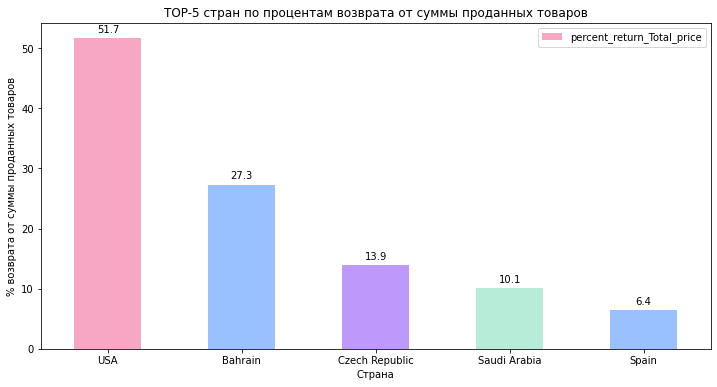

In [535]:
colors = ['#eb236b', '#0066ff', '#5d00f5', '#4bd0a0', '#0066ff']
ax = df_c_r_sum.plot(kind='bar',
x='Country', 
        y='percent_return_Total_price', 
                   color = colors,
                   alpha = 0.4,
                   title = 'TOP-5 стран по процентам возврата от суммы проданных товаров',
              xlabel='Страна', ylabel='% возврата от суммы проданных товаров', figsize=(12, 6)
                   
        )
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')
plt.xticks(rotation=0)

In [281]:
df_joined[df_joined['Quantity_y'].isnull()|df_joined['Total_price_y'].isnull()]

,Country,Quantity_x,Total_price_x,Quantity_y,Total_price_y,percent_return_Quantity,percent_return_Total_price
18,Singapore,5241,21279.29,NaN,NaN,NaN,NaN
23,Unspecified,3300,4749.79,NaN,NaN,NaN,NaN
24,Canada,2763,3666.38,NaN,NaN,NaN,NaN
26,Iceland,2458,4310.00,NaN,NaN,NaN,NaN
27,Greece,1557,4760.52,NaN,NaN,NaN,NaN
28,United Arab Emirates,982,1902.28,NaN,NaN,NaN,NaN
31,Lithuania,652,1661.06,NaN,NaN,NaN,NaN
33,Lebanon,386,1693.88,NaN,NaN,NaN,NaN
34,Brazil,356,1143.60,NaN,NaN,NaN,NaN
35,RSA,351,1002.31,NaN,NaN,NaN,NaN


In [282]:
df[((df['Country']=='Singapore')|(df['Country']=='Canada'))&(df['Quantity']<0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_price,offline/online,Year,Month,Day
144830,C548830,M,Manual,-1,2011-04-04 13:08:00,162.60,12744,Singapore,-162.60,online,2011,4,4
144831,C548830,M,Manual,-1,2011-04-04 13:08:00,2382.92,12744,Singapore,-2382.92,online,2011,4,4
144832,C548830,M,Manual,-1,2011-04-04 13:08:00,239.30,12744,Singapore,-239.30,online,2011,4,4
144833,C548830,M,Manual,-1,2011-04-04 13:08:00,1252.95,12744,Singapore,-1252.95,online,2011,4,4
144834,C548834,M,Manual,-1,2011-04-04 13:09:00,2053.07,12744,Singapore,-2053.07,online,2011,4,4
406404,C571750,M,Manual,-1,2011-10-19 11:16:00,3949.32,12744,Singapore,-3949.32,online,2011,10,19
406405,C571750,M,Manual,-1,2011-10-19 11:16:00,2118.74,12744,Singapore,-2118.74,online,2011,10,19


In [538]:
dd = df[(df['CustomerID']=='12744')&(df['StockCode']=='M')] 

In [541]:
dd

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_price,offline/online,Year,Month,Day
144825,548813,M,Manual,1,2011-04-04 13:03:00,162.60,12744,Singapore,162.60,online,2011,4,4
144826,548813,M,Manual,1,2011-04-04 13:03:00,2382.92,12744,Singapore,2382.92,online,2011,4,4
144827,548813,M,Manual,1,2011-04-04 13:03:00,239.30,12744,Singapore,239.30,online,2011,4,4
144828,548813,M,Manual,1,2011-04-04 13:03:00,1252.95,12744,Singapore,1252.95,online,2011,4,4
144829,548820,M,Manual,1,2011-04-04 13:04:00,2053.07,12744,Singapore,2053.07,online,2011,4,4
144830,C548830,M,Manual,-1,2011-04-04 13:08:00,162.60,12744,Singapore,-162.60,online,2011,4,4
144831,C548830,M,Manual,-1,2011-04-04 13:08:00,2382.92,12744,Singapore,-2382.92,online,2011,4,4
144832,C548830,M,Manual,-1,2011-04-04 13:08:00,239.30,12744,Singapore,-239.30,online,2011,4,4
144833,C548830,M,Manual,-1,2011-04-04 13:08:00,1252.95,12744,Singapore,-1252.95,online,2011,4,4
144834,C548834,M,Manual,-1,2011-04-04 13:09:00,2053.07,12744,Singapore,-2053.07,online,2011,4,4


In [283]:
df_storno = df[(df.Country.isin(['Singapore','Canada','Iceland', 'Greece', 'United Arab Emirates', 'Lithuania', 'Lebanon', 'Brazil', 'RSA']))&(df['Quantity']<0)]

In [284]:
df_storno

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_price,offline/online,Year,Month,Day
144830,C548830,M,Manual,-1,2011-04-04 13:08:00,162.60,12744,Singapore,-162.60,online,2011,4,4
144831,C548830,M,Manual,-1,2011-04-04 13:08:00,2382.92,12744,Singapore,-2382.92,online,2011,4,4
144832,C548830,M,Manual,-1,2011-04-04 13:08:00,239.30,12744,Singapore,-239.30,online,2011,4,4
144833,C548830,M,Manual,-1,2011-04-04 13:08:00,1252.95,12744,Singapore,-1252.95,online,2011,4,4
144834,C548834,M,Manual,-1,2011-04-04 13:09:00,2053.07,12744,Singapore,-2053.07,online,2011,4,4
259033,C559681,POST,POSTAGE,-1,2011-07-11 14:51:00,50.00,12717,Greece,-50.00,online,2011,7,11
406404,C571750,M,Manual,-1,2011-10-19 11:16:00,3949.32,12744,Singapore,-3949.32,online,2011,10,19
406405,C571750,M,Manual,-1,2011-10-19 11:16:00,2118.74,12744,Singapore,-2118.74,online,2011,10,19


In [285]:
df_storno['Total_price'].sum()+50 #50 - Греция

-12158.9

In [546]:
df_ = df[(df.Country.isin(['Singapore']))&(df['Quantity']>0)&(df['StockCode']=='M')]

In [548]:
df_.Total_price.sum()

12158.9

In [ ]:
#Самый большой процент возврата по количеству товаров - USA - 57,9% от кол-ва купленных товаров в этой стране, также в TOP-5 по количеству возвратов вошли страны:
#Bahrain - 17,2%, Czech Republic - 11,62%, Saudi Arabia - 6,25%, United Kingdom - 5,54%.
#По общей сумме возвратов в разрезе стран ТОР-5 выглядит следующим образом: USA - 51,66% от суммы купленных товаров
#в этой стране, Bahrain - 27,28%, Czech Republic - 13,9%, Saudi Arabia - 10,11%, Spain - 6,4%.
#Возвратов не было в следующих странах: Singapore, Canada, Iceland, Greece, United Arab Emirates, Lithuania, Lebanon, Brazil, RSA.
# Хотя по Сингапуру есть сторнирующие служебные операции MANUAL - на сумму 12158,9£. Что это за операции?
#3300 записей в датафрейме не имеют названия страны - Unspecified, следует обратить внимание на корректное 
#заполнение поля с указанием страны. Необходимо выяснить почему не определилась страна при совершении покупки?

In [ ]:
#Какие товары возвращают чаще всего?

In [286]:
df_return.groupby('Description')[['Quantity', 'Total_price']].sum().sort_values('Quantity').reset_index().head(10)

,Description,Quantity,Total_price
0,"PAPER CRAFT , LITTLE BIRDIE",-80995,-168469.60
1,MEDIUM CERAMIC TOP STORAGE JAR,-74494,-77479.64
2,ROTATING SILVER ANGELS T-LIGHT HLDR,-9376,-321.60
3,FAIRY CAKE FLANNEL ASSORTED COLOUR,-3150,-6591.42
4,PINK BLUE FELT CRAFT TRINKET BOX,-2617,-2778.77
5,WHITE HANGING HEART T-LIGHT HOLDER,-2578,-6624.30
6,GIN + TONIC DIET METAL SIGN,-2030,-3775.33
7,HERB MARKER BASIL,-1527,-841.05
8,FELTCRAFT DOLL MOLLY,-1447,-3512.65
9,TEA TIME PARTY BUNTING,-1424,-3692.95


In [287]:
df_temp = df_return.groupby('Description')[['Quantity', 'Total_price']].agg({'Quantity' : ['sum', 'count']}).reset_index()
#.sort_values(df_return['Quantity']).reset_index().head(10)

In [288]:
df_temp

Description Quantity      
                                            sum count
0        50'S CHRISTMAS GIFT BAG LARGE       -2     1
1                    DOLLY GIRL BEAKER       -7     2
2           OVAL WALL MIRROR DIAMANTE        -5     4
3      SET 2 TEA TOWELS I LOVE LONDON        -8     3
4               SPACEBOY BABY GIFT SET       -6     3
...                                ...      ...   ...
1958  ZINC SWEETHEART WIRE LETTER RACK       -4     1
1959    ZINC T-LIGHT HOLDER STAR LARGE      -11     2
1960   ZINC T-LIGHT HOLDER STARS SMALL      -44     3
1961    ZINC TOP  2 DOOR WOODEN SHELF        -5     2
1962  ZINC WILLIE WINKIE  CANDLE STICK      -12     1

[1963 rows x 3 columns]

In [289]:
df_temp.columns = ['Description', 'Quantity_sum','Quantity_count']

In [ ]:
#Выведу ТОР-5 товаров по количеству возвращенных единиц

In [290]:
df_temp.sort_values('Quantity_sum').head(5)

,Description,Quantity_sum,Quantity_count
1177,"PAPER CRAFT , LITTLE BIRDIE",-80995,1
1019,MEDIUM CERAMIC TOP STORAGE JAR,-74494,10
1451,ROTATING SILVER ANGELS T-LIGHT HLDR,-9376,4
586,FAIRY CAKE FLANNEL ASSORTED COLOUR,-3150,3
1226,PINK BLUE FELT CRAFT TRINKET BOX,-2617,5


In [291]:
df[df['Description']=='MEDIUM CERAMIC TOP STORAGE JAR']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_price,offline/online,Year,Month,Day
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom,77183.60,online,2011,1,18
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346,United Kingdom,-77183.60,online,2011,1,18
186770,552882,23166,MEDIUM CERAMIC TOP STORAGE JAR,96,2011-05-12 10:10:00,1.04,14646,Netherlands,99.84,online,2011,5,12
187196,552953,23166,MEDIUM CERAMIC TOP STORAGE JAR,4,2011-05-12 12:11:00,1.25,16745,United Kingdom,5.00,online,2011,5,12
187718,553005,23166,MEDIUM CERAMIC TOP STORAGE JAR,5,2011-05-12 16:29:00,1.25,14651,United Kingdom,6.25,online,2011,5,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
533742,581108,23166,MEDIUM CERAMIC TOP STORAGE JAR,2,2011-12-07 12:16:00,1.25,15984,United Kingdom,2.50,online,2011,12,7
536248,581219,23166,MEDIUM CERAMIC TOP STORAGE JAR,1,2011-12-08 09:28:00,2.46,00000,United Kingdom,2.46,offline,2011,12,8
539776,581439,23166,MEDIUM CERAMIC TOP STORAGE JAR,2,2011-12-08 16:30:00,2.46,00000,United Kingdom,4.92,offline,2011,12,8
540301,581476,23166,MEDIUM CERAMIC TOP STORAGE JAR,48,2011-12-09 08:48:00,1.04,12433,Norway,49.92,online,2011,12,9


In [292]:
df_return[df_return['Description']=='ROTATING SILVER ANGELS T-LIGHT HLDR']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_price,offline/online,Year,Month,Day
4287,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2010-12-02 14:23:00,0.03,15838,United Kingdom,-280.80,online,2010,12,2
11511,C537251,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9,2010-12-06 10:45:00,2.55,00000,United Kingdom,-22.95,offline,2010,12,6
44303,C540164,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-6,2011-01-05 12:02:00,2.55,14911,EIRE,-15.30,online,2011,1,5
414618,C572473,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-1,2011-10-24 13:34:00,2.55,18188,United Kingdom,-2.55,online,2011,10,24


In [293]:
df[df['Description']=='PAPER CRAFT , LITTLE BIRDIE']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_price,offline/online,Year,Month,Day
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446,United Kingdom,168469.6,online,2011,12,9
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446,United Kingdom,-168469.6,online,2011,12,9


In [294]:
df_return[df_return['Description']=='FAIRY CAKE FLANNEL ASSORTED COLOUR']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_price,offline/online,Year,Month,Day
160145,C550456,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,-3114,2011-04-18 13:08:00,2.10,15749,United Kingdom,-6539.40,online,2011,4,18
488525,C577832,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,-18,2011-11-22 10:18:00,0.79,18274,United Kingdom,-14.22,online,2011,11,22
518995,C580131,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,-18,2011-12-01 18:12:00,2.10,17576,United Kingdom,-37.80,online,2011,12,1


In [295]:
df_return[df_return['Description']=='PINK BLUE FELT CRAFT TRINKET BOX']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_price,offline/online,Year,Month,Day
74461,C542426,20971,PINK BLUE FELT CRAFT TRINKET BOX,-12,2011-01-28 09:32:00,1.25,14146,United Kingdom,-15.00,online,2011,1,28
156807,C550171,20971,PINK BLUE FELT CRAFT TRINKET BOX,-1,2011-04-14 16:53:00,1.25,12585,Germany,-1.25,online,2011,4,14
235914,C557659,20971,PINK BLUE FELT CRAFT TRINKET BOX,-12,2011-06-21 17:42:00,1.25,16186,United Kingdom,-15.00,online,2011,6,21
390544,C570556,20971,PINK BLUE FELT CRAFT TRINKET BOX,-1296,2011-10-11 11:10:00,1.06,16029,United Kingdom,-1373.76,online,2011,10,11
390548,C570556,20971,PINK BLUE FELT CRAFT TRINKET BOX,-1296,2011-10-11 11:10:00,1.06,16029,United Kingdom,-1373.76,online,2011,10,11


In [ ]:
#Подавляющее количество товаров из TOP-5 по количеству возвращенных единиц товаров - были возвращены оптовыми покупателями
#(CustomerID 12346,15838 , 16446, 15749, 16029).У покупателя 12346 это была единственная покупка.
#Почему оптовики возвращают товары?

In [ ]:
#Выведу ТОР-5 товаров по количеству возвратов (Сколько раз раз возвращали товар, независимо от его количества?)

In [296]:
df_temp.sort_values('Quantity_count', ascending = False).head(5)

,Description,Quantity_sum,Quantity_count
1391,REGENCY CAKESTAND 3 TIER,-857,181
881,JAM MAKING SET WITH JARS,-247,87
1525,SET OF 3 CAKE TINS PANTRY DESIGN,-157,74
1700,STRAWBERRY CERAMIC TRINKET BOX,-363,55
1449,ROSES REGENCY TEACUP AND SAUCER,-437,54


## Экспорт очищенных данных в csv-файл

In [ ]:
#экспорт очищенного датафрейма в csv-файл для возможной обработки другими инструментами

In [297]:
df.to_csv("output.csv", index = False, line_terminator ='\n',)

In [298]:
dff = pd.read_csv('output.csv')

In [299]:
dff

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_price,offline/online,Year,Month,Day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,online,2010,12,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,online,2010,12,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,online,2010,12,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,online,2010,12,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,online,2010,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
539389,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20,online,2011,12,9
539390,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,online,2011,12,9
539391,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,online,2011,12,9
539392,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,online,2011,12,9


# Построение модели

In [ ]:
#Построю модель линейной регрессии и спрогнозирую объемы продаж по месяцам и годам на три месяца вперед.

In [ ]:
#Исключу из данных с общими продажами по месяцам и годам декабрь 2011 года, так как данные за этот месяц
#неполные (по 09.12.2011) - буду прогнозировать продажи на декабрь 2011 в том числе.

In [300]:
df_date_without_1211 = df_date

In [301]:
df_date_without_1211

,Year,Month,Quantity,Total_price
0,2010,12,343197,748957.020
1,2011,1,307940,560000.260
2,2011,2,280684,498062.650
3,2011,3,372131,683267.080
4,2011,4,295170,493207.121
5,2011,5,389870,723333.510
6,2011,6,381851,691123.120
7,2011,7,395731,681300.111
8,2011,8,409426,682680.510
9,2011,9,563391,1019687.622


In [302]:
df_date_without_1211 = df_date_without_1211.drop([12])

In [303]:
df_date_without_1211

,Year,Month,Quantity,Total_price
0,2010,12,343197,748957.020
1,2011,1,307940,560000.260
2,2011,2,280684,498062.650
3,2011,3,372131,683267.080
4,2011,4,295170,493207.121
5,2011,5,389870,723333.510
6,2011,6,381851,691123.120
7,2011,7,395731,681300.111
8,2011,8,409426,682680.510
9,2011,9,563391,1019687.622


In [304]:
#Построю модель линейной регресии
x = df_date_without_1211[['Year', 'Month']]
y = df_date_without_1211['Total_price']

In [332]:
x

,Year,Month
0,2010,12
1,2011,1
2,2011,2
3,2011,3
4,2011,4
5,2011,5
6,2011,6
7,2011,7
8,2011,8
9,2011,9


In [333]:
y

0      748957.020
1      560000.260
2      498062.650
3      683267.080
4      493207.121
5      723333.510
6      691123.120
7      681300.111
8      682680.510
9     1019687.622
10    1070704.670
11    1461756.250
Name: Total_price, dtype: float64

In [551]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [563]:
#Разбиваю данные на тестовые и тренировочные. Данных не много, для проверки оставлю 15%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15)

In [564]:
#Для обучения 10 строк
x_train.shape

(10, 2)

In [565]:
y_train.shape

(10,)

In [566]:
#Обучаю модель
model = LinearRegression()
model.fit(x_train, y_train) 

LinearRegression()

In [567]:
#Подобранные моделью коэффициенты (a)
model.coef_

array([543953.24018097,  79372.73335051])

In [568]:
#(b)
model.intercept_

-1093549528.5439487

In [569]:
x_test

,Year,Month
8,2011,8
6,2011,6


In [570]:
#Получаю прогноз на основе тестовых данных
y_pred = model.predict(x_test)
y_pred

array([975419.32677889, 816673.86007786])

In [571]:
df_date

,Year,Month,Quantity,Total_price
0,2010,12,343197,748957.020
1,2011,1,307940,560000.260
2,2011,2,280684,498062.650
3,2011,3,372131,683267.080
4,2011,4,295170,493207.121
5,2011,5,389870,723333.510
6,2011,6,381851,691123.120
7,2011,7,395731,681300.111
8,2011,8,409426,682680.510
9,2011,9,563391,1019687.622


In [561]:
from sklearn.metrics import mean_squared_error #MSE
#from sklearn.metrics import mean_absolute_error #MAE
from sklearn.metrics import r2_score#R 2


In [572]:
 #оценке качества модели среднеквадратическая ошибка RMSE
mean_squared_error(y_test,y_pred)
#mean_absolute_error(y_test,y_pred)
np.sqrt(mean_squared_error(y_test,y_pred))  # RMSE



225232.10604084135

In [318]:
#Получается, что наша модель ошибается в среднем на 225 тысяч

In [573]:
#Посчитаю разницу между прогнозом и фактом

In [576]:
x_test['Month/Year']= x_test.apply(lambda d: str(d['Month'])+'/'+str(d['Year']), axis =1)

<ipython-input-576-9071e4f16934>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test['Month/Year']= x_test.apply(lambda d: str(d['Month'])+'/'+str(d['Year']), axis =1)


In [577]:
x_test

,Year,Month,Month/Year
8,2011,8,8/2011
6,2011,6,6/2011


Text(0.5, 1.0, 'Факт и прогноз объема продаж на тестовых данных')

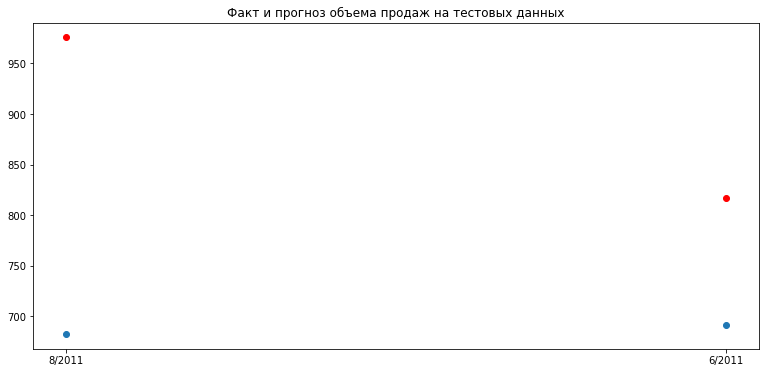

In [578]:
#Синие точки прогноз, красные - фактические значения
plt.scatter(x_test['Month/Year'], y_test/1000)
plt.scatter(x_test['Month/Year'], y_pred/1000, c='r')
plt.title('Факт и прогноз объема продаж на тестовых данных')

In [579]:
y_pred-y_test

8    292738.816779
6    125550.740078
Name: Total_price, dtype: float64

In [580]:
(y_pred-y_test).mean()

209144.77842835314

In [ ]:
#Получается в данном случае модель ошиблась в среднем на 209 тыс.

In [442]:
#Спрогнозирую продажи на 3 месяца вперед - декабрь 2012, так как данные за этот месяц были удалены,
#а также январь и февраль 2012.

In [581]:
#Создаю датафрейм с месяцами и годами для прогноза (12.2011-02.2012)
x_pred = pd.DataFrame([{"Year": 2011, "Month":12}, {"Year": 2012, "Month":1}, {"Year": 2012, "Month":2}])

In [582]:
x_pred

,Year,Month
0,2011,12
1,2012,1
2,2012,2


In [583]:
#Получаю прогноз на основе тестовых данных
y_pred = model.predict(x_pred)
y_pred

array([1292910.26018095,  963763.43350625, 1043136.16685677])

In [446]:
#прибавилю прогнозные данные к фактическим и построю график динамики продаж с прогнозом в том числе

In [584]:
predict = x_pred

In [585]:
predict['Total_price'] = y_pred

In [586]:
predict

,Year,Month,Total_price
0,2011,12,1.292910e+06
1,2012,1,9.637634e+05
2,2012,2,1.043136e+06


In [587]:
df_concat = pd.concat([df_date_without_1211, predict])

In [588]:
df_concat.Month = df_concat.Month.map(str)

In [589]:
df_concat.Year = df_concat.Year.map(str)

In [590]:
df_concat['Month/Year']= df_concat.apply(lambda d: d['Month']+'/'+d['Year'], axis =1)

In [591]:
df_concat

,Year,Month,Quantity,Total_price,Month/Year
0,2010,12,343197.0,7.489570e+05,12/2010
1,2011,1,307940.0,5.600003e+05,1/2011
2,2011,2,280684.0,4.980627e+05,2/2011
3,2011,3,372131.0,6.832671e+05,3/2011
4,2011,4,295170.0,4.932071e+05,4/2011
5,2011,5,389870.0,7.233335e+05,5/2011
6,2011,6,381851.0,6.911231e+05,6/2011
7,2011,7,395731.0,6.813001e+05,7/2011
8,2011,8,409426.0,6.826805e+05,8/2011
9,2011,9,563391.0,1.019688e+06,9/2011


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, '12/2010'),
  Text(1, 0, '1/2011'),
  Text(2, 0, '2/2011'),
  Text(3, 0, '3/2011'),
  Text(4, 0, '4/2011'),
  Text(5, 0, '5/2011'),
  Text(6, 0, '6/2011'),
  Text(7, 0, '7/2011'),
  Text(8, 0, '8/2011'),
  Text(9, 0, '9/2011'),
  Text(10, 0, '10/2011'),
  Text(11, 0, '11/2011'),
  Text(12, 0, '12/2011'),
  Text(13, 0, '1/2012'),
  Text(14, 0, '2/2012')])

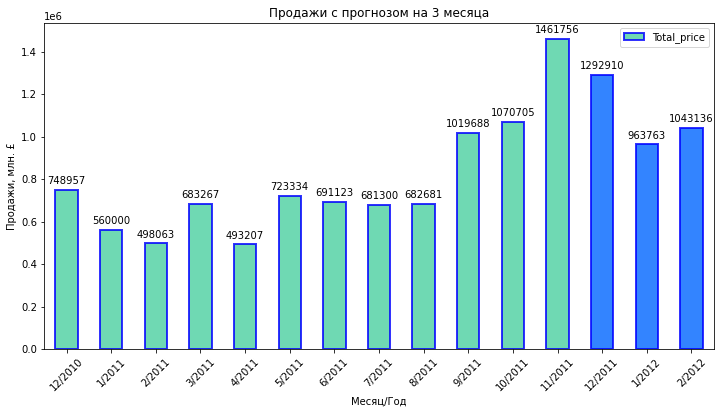

In [593]:
color = ['#4bd0a0', '#4bd0a0', '#4bd0a0', '#4bd0a0', '#4bd0a0', '#4bd0a0', '#4bd0a0', '#4bd0a0', '#4bd0a0', '#4bd0a0', '#4bd0a0', '#4bd0a0', '#0066ff', '#0066ff', '#0066ff']
ax = df_concat.plot(kind = 'bar',
x='Month/Year', 
        y='Total_price', 
                   alpha=0.8, edgecolor="b", linewidth=2, color = color,
                   title = 'Продажи с прогнозом на 3 месяца',
              xlabel='Месяц/Год', ylabel='Продажи, млн. £', figsize=(12, 6)
        )
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')
plt.xticks(rotation=45)

In [ ]:
#Как видно из диаграммы модель предсказала в декабре 2011 небольшой спад по сравнению с ноябрем 2011, но значительный рост по
#сравнению с декабрем 2010. Продажи в январе и феврале 2012 значительно вырастут по сравнению с показателями
#этих же месяцев 2011 года (почти в 2 раза).